# Torre - Data science intern tech test
## Diego Torres
For this technical test, in this jupyter notebook, I am going to build a graphical database with the given dataset (reed_uk.csv) and perform an analysis of the Reed job board data to provide interesting information oriented to the job seekers.

## Links to important notebook cells
1. [Exploratory data analysis](#e_data_a)
2. [The approach this data analysis will take](#approach)
3. [Data preparing and cleaning](#data_cleaning)
4. [Data analysis](#data_analysis)
4. [Graph database](#gdb)

<a id='e_data_a'></a>
# Exploratory data analysis

### We start importing our libraries and modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
from base64 import b64decode
import watermark

### This is going to help us for our charts

In [2]:
%matplotlib inline

bb_utils.jupyter_notebook_gdrive_img_link??

plt.style.use('default') # making grapghs and charts looks better
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # setting type of grid in seaborn

#pd.options.display.float_format = '{:20, .2f}'

Object `bb_utils.jupyter_notebook_gdrive_img_link` not found.


### We read the dataset and obtain general information from it <a id='df.info'></a>

In [3]:
df = pd.read_csv('reed_uk.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   category          50000 non-null  object
 1   city              50000 non-null  object
 2   company_name      50000 non-null  object
 3   geo               50000 non-null  object
 4   job_board         50000 non-null  object
 5   job_description   50000 non-null  object
 6   job_requirements  20548 non-null  object
 7   job_title         50000 non-null  object
 8   job_type          50000 non-null  object
 9   post_date         50000 non-null  object
 10  salary_offered    50000 non-null  object
 11  state             49980 non-null  object
dtypes: object(12)
memory usage: 4.6+ MB


### Let's see every column with their first entries

In [4]:
df.head()

,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
0,catering jobs,Chudleigh,Haulfryn Group,uk,reed,Apply now New opportunity not to be missed! H...,NaN,Commis Chef,"Permanent, full-time",3/12/2018,"£18,323 per annum",Devon
1,law jobs,Swindon,Reed,uk,reed,Apply now This role requires an experienced s...,NaN,Corporate Legal Secretary,"Permanent, full-time",3/8/2018,"£18,000 - £22,000 per annum",Wiltshire
2,factory jobs,Norfolk,Swanstaff Recruitment Ltd,uk,reed,Apply now Job Title: Warehouse personLocation...,NaN,Warehouse Person,"Permanent, full-time",2/27/2018,Salary not specified,East Anglia
3,law jobs,Hurstpierpoint,Castles Solicitors,uk,reed,Apply now Castles Solicitors are looking for ...,Required skills Admin Case Management Corresp...,Legal Secretary / Admin Assistant,"Permanent, full-time or part-time",2/21/2018,"£15,000 - £17,000 per annum, pro-rata",West Sussex
4,factory jobs,Hertfordshire,Marketplace Group,uk,reed,Apply now International Pharmaceutical Manufa...,NaN,Category Planner - Pharmaceutical,"Permanent, full-time",3/1/2018,"£37,000 - £45,000 per annum",South East England


#### One of the most important columns, 'salary_offered', looks inconsistent, we are going to deal with it later.

### Let's see the 10 most frequent categories in the 'category' column

In [5]:
categories = df['category']
n=10
categories.value_counts()[:n]

health jobs                   1930
education jobs                1898
it jobs                       1890
logistics jobs                1885
construction property jobs    1859
engineering jobs              1858
accountancy jobs              1856
sales jobs                    1855
accountancy qualified jobs    1836
social care jobs              1823
Name: category, dtype: int64

### Let's see the 10 most frequent job titles in the 'job_title' column

In [6]:
job_titles = df['job_title']
n=10
job_titles.value_counts()[:n]

Administrator               162
Customer Service Advisor    145
Management Accountant       139
Warehouse Operative         131
Recruitment Consultant      120
Buyer                       111
Account Manager             111
Care Assistant              111
Vehicle Technician          108
Support Worker              107
Name: job_title, dtype: int64

### Let's see the 10 most frequent companies posting jobs in the 'company_name' column

In [7]:
companies = df['company_name']
n=10
companies.value_counts()[:n]

Hays Specialist Recruitment Limited                 1830
Reed                                                 804
Search Consultancy                                   534
Pareto                                               450
Adecco UK Limited                                    355
SW6 Associates Ltd                                   302
Randstad Construction, Property and Engineering      287
Rise Technical Recruitment Limited                   280
Interaction Recruitment                              267
Reed Accountancy                                     266
Name: company_name, dtype: int64

### Let's see the 10 most frequent states in the 'state' column

In [8]:
states = df['state']
n=10
states.value_counts()[:n]

London                5900
South East England    5667
Lancashire            2375
West Midlands         1934
Surrey                1915
West Yorkshire        1616
Hampshire             1450
Berkshire             1373
Essex                 1281
Kent                  1223
Name: state, dtype: int64

### Let's see the 10 most frequent cities in the 'city' column

In [9]:
cities = df['city']
n=10
cities.value_counts()[:n]

London               4349
Manchester           1283
Central London        997
City of London        943
Birmingham            931
Bristol               881
Leeds                 877
City Of London        687
West London           636
South West London     493
Name: city, dtype: int64

<a id='approach'></a>
# The approach this data analysis will take

For this test I was given a dataset of job offers with the columns described above. My approach to the analysis of this data will be focused to provide interesting information to applicants, based mainly on their location, establishing relationships between salary, cities, states, categories...

<a id='data_cleaning'></a>
# Data preparing and cleaning

## Let's prepare and clean the data.
### As we saw [here](#df.info), job_requirements column almost has 30k null entries, let's take a look at the first 20 rows.

In [10]:
df["job_requirements"].head(20)


0                                                   NaN
1                                                   NaN
2                                                   NaN
3      Required skills Admin Case Management Corresp...
4                                                   NaN
5                                                   NaN
6                                                   NaN
7      Required skills Accident Paint Repair Spray P...
8                                                   NaN
9      Required skills Diary Management Legal Secret...
10     Required skills Car Dealership Sales Sales Ex...
11                                                  NaN
12                                                  NaN
13                                                  NaN
14                                                  NaN
15     Required skills chef line chef commis chef co...
16                          Required skills Businesses 
17     Required skills Catering Event Hospitalit

### As we can see, this column has many null entries and inconsistent information, so we are going to delete it.

In [11]:
df.drop(["job_requirements"], inplace=True, axis=1)

### Nice, let's delete rows that have null entries in the 'state' column.

In [12]:
df = df.dropna()

### As we know, this dataset comes from the UK job board Reed. So the 'geo' and 'job_board' columns have always the same value: 'uk' and 'reed'.
#### Let's delete them.

In [13]:
df.drop(["job_board", "geo"], inplace=True, axis=1)

### The 'job_description' column provide us a lot of data, but is very inconsistent. 
#### Maybe with a trained Machine learning algorithm we can extract some interesting information. But right now it is useless for our purpose. 
#### Let's delete this column.

In [14]:
df.drop(["job_description"], inplace=True, axis=1)

## The 'salary_offered' column
##### It is hard to deal with the salary column. First of all, we are going to delete every row that does not specifies the salary, like "Salary negotiable", "Salary not specified", "Competitive salary"

In [15]:
searchfor = ['Salary negotiable', 'Salary not specified', 'Competitive salary', 'Commissiononly']
df = df[~df.salary_offered.str.contains('|'.join(searchfor))]

#### Now, I decided to create a new column with just the salary value. And we will take the biggest salaries in every range.

In [16]:
df["salary_value"] = df["salary_offered"] # Copying the column
df['salary_value'] = df['salary_value'].str.replace('pro-rata', '') # Deleting this phrase 
lists = df['salary_value'].str.split("-", 1) # Separating de values in lists to obtain the bigger one

for y in lists:
    if len(y) > 1:
        y.pop(0) # Loop to delete lowest list value
        
lists = lists.apply(pd.Series).stack().reset_index(drop = True) # To convert the lists to values
df= df.reset_index() # Reseting the index before copying
df['salary_value'] = lists # Copying the series to the data frame
df['salary_value'] = df['salary_value'].replace(to_replace='[^0-9\.]+',value='',inplace=False,regex=True) # Filtering to only digits and "."
df['salary_value'] = pd.to_numeric(df['salary_value'], errors='coerce') # Casting from string to float
df = df.dropna() # Deleting any possible row with null values
df= df.reset_index() # Reseting the index again

# Let's check
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   level_0         41106 non-null  int64  
 1   index           41106 non-null  int64  
 2   category        41106 non-null  object 
 3   city            41106 non-null  object 
 4   company_name    41106 non-null  object 
 5   job_title       41106 non-null  object 
 6   job_type        41106 non-null  object 
 7   post_date       41106 non-null  object 
 8   salary_offered  41106 non-null  object 
 9   state           41106 non-null  object 
 10  salary_value    41106 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 3.4+ MB


,level_0,index,category,city,company_name,job_title,job_type,post_date,salary_offered,state,salary_value
0,0,0,catering jobs,Chudleigh,Haulfryn Group,Commis Chef,"Permanent, full-time",3/12/2018,"£18,323 per annum",Devon,18323.00
1,1,1,law jobs,Swindon,Reed,Corporate Legal Secretary,"Permanent, full-time",3/8/2018,"£18,000 - £22,000 per annum",Wiltshire,22000.00
2,2,3,law jobs,Hurstpierpoint,Castles Solicitors,Legal Secretary / Admin Assistant,"Permanent, full-time or part-time",2/21/2018,"£15,000 - £17,000 per annum, pro-rata",West Sussex,17000.00
3,3,4,factory jobs,Hertfordshire,Marketplace Group,Category Planner - Pharmaceutical,"Permanent, full-time",3/1/2018,"£37,000 - £45,000 per annum",South East England,45000.00
4,4,5,retail jobs,Belfast,Vodafone,Retail Adviser 20hrs/week - Belfast Donnegal P...,"Permanent, part-time",3/12/2018,"£9,100 - £9,152 per annum, OTE",County Antrim,9152.00
5,5,6,factory jobs,Thetford,Hales Group Limited,Break Press Operator,"Permanent, full-time",2/28/2018,£9.25 - £10.15 per hour,Norfolk,10.15
6,6,7,motoring automotive jobs,Luton,Fine Recruiting Ltd,Vehicle Paint Sprayer,"Permanent, full-time",3/2/2018,"£35,000 - £40,000 per annum",Bedfordshire,40000.00
7,7,8,motoring automotive jobs,Blackburn,Audi,Vehicle Technician,"Permanent, full-time",2/28/2018,"£23,000 - £26,600 per annum",Lancashire,26600.00
8,8,9,law jobs,Leeds,Rachel Clark Legal Recruitment,LEGAL SECRETARY,"Permanent, full-time",3/12/2018,"£18,000 - £25,000 per annum, inc benefits",West Yorkshire,25000.00
9,9,10,motoring automotive jobs,Bermuda Park,Keastone Recruitment,Sales Executive (Automotive Main Dealer),"Permanent, full-time",3/12/2018,"£12,000 - £40,000 per annum, OTE",Warwickshire,40000.00


### Let's organize it a little bit. (deleting index columns and ordering the others)

In [17]:
df = df[['category', 'job_title', 'job_type', 'company_name', 'state', 'city', 'salary_offered', 'salary_value', 'post_date']]
df

,category,job_title,job_type,company_name,state,city,salary_offered,salary_value,post_date
0,catering jobs,Commis Chef,"Permanent, full-time",Haulfryn Group,Devon,Chudleigh,"£18,323 per annum",18323.0,3/12/2018
1,law jobs,Corporate Legal Secretary,"Permanent, full-time",Reed,Wiltshire,Swindon,"£18,000 - £22,000 per annum",22000.0,3/8/2018
2,law jobs,Legal Secretary / Admin Assistant,"Permanent, full-time or part-time",Castles Solicitors,West Sussex,Hurstpierpoint,"£15,000 - £17,000 per annum, pro-rata",17000.0,2/21/2018
3,factory jobs,Category Planner - Pharmaceutical,"Permanent, full-time",Marketplace Group,South East England,Hertfordshire,"£37,000 - £45,000 per annum",45000.0,3/1/2018
4,retail jobs,Retail Adviser 20hrs/week - Belfast Donnegal P...,"Permanent, part-time",Vodafone,County Antrim,Belfast,"£9,100 - £9,152 per annum, OTE",9152.0,3/12/2018
...,...,...,...,...,...,...,...,...,...
41101,graduate training internships jobs,Graduate Business Management Trainee - Portsmouth,"Permanent, full-time",Bridgewater Resources UK,Hampshire,Portsmouth,"£23,000 - £26,000 per annum",26000.0,3/5/2018
41102,science jobs,Scientist In vitro Cell-Free & Cell Based Assays,"Contract, full-time",Hays Specialist Recruitment Limited,South East England,Oxfordshire,£22.00 - £26.00 per hour,26.0,3/7/2018
41103,graduate training internships jobs,Graduate Training Scheme - Recruitment,"Permanent, full-time",The Graduate,Northamptonshire,Northampton,"£18,000 - £21,000 per annum",21000.0,3/9/2018
41104,purchasing jobs,AV Procurement Assistant,"Permanent, full-time",Concept Human Solutions,Surrey,Egham,"£27,500 - £30,000 per annum, negotiable, OTE",30000.0,3/6/2018


### Perfect, our data is ready to be analized!

<a id='data_analysis'></a>
# Data analysis

### Let's start by looking at the states with the highest demand for work

<AxesSubplot:>

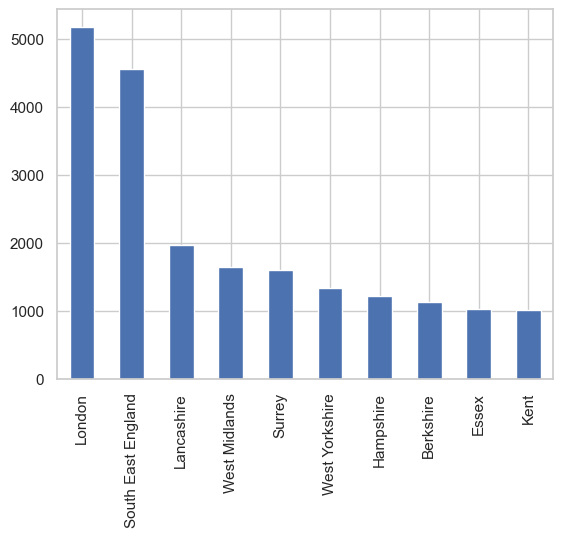

In [18]:
# States
df['state'].value_counts()[:10].plot(kind='bar')

### As we can see, the principal states are London and South East England, with London having more than 5000 job offers. Let's analyze these states.

## London

### Numbers of Job offers in London City (Entries that contain "London" in "city" column, for example: "West London", "South West London" )
##### (True value)

<AxesSubplot:>

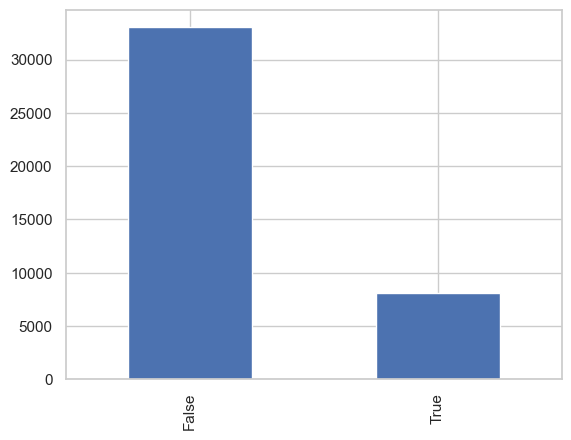

In [19]:
df['city'].str.contains('London').value_counts().plot(kind='bar')

### Let's see the most popular job categories in London

<AxesSubplot:>

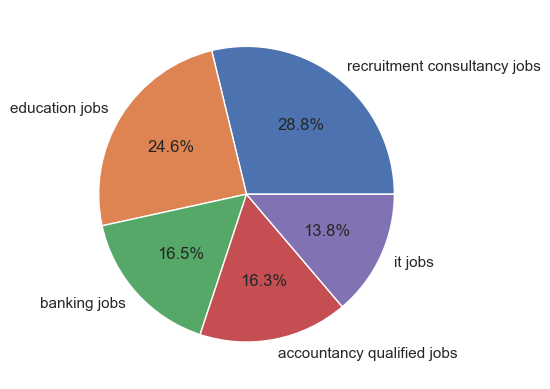

In [20]:
df_cat = df
df_cat = df[['category','state']]
df_lon_cat = df_cat 
df_lon_cat = df_lon_cat[df_lon_cat.state.str.contains('London')]
df_lon_cat['category'].value_counts()[:5].plot(kind='pie', ylabel='', autopct='%1.1f%%')

### Let's see the salaries oh those categories in London (Anual salaries)

<BarContainer object of 1278 artists>

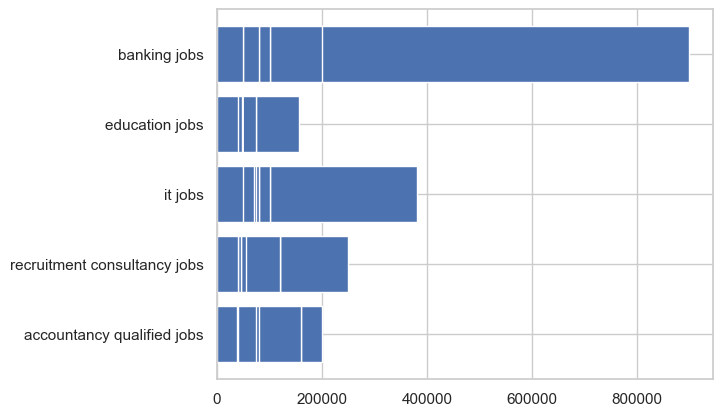

In [21]:
df2 = df[['category','state','salary_offered', 'salary_value']]
df2 = df2[df2.state.str.contains('London')]
df2 = df2[df2.salary_offered.str.contains('per annum')]
searchfor = ['education jobs', 'banking jobs', 'it jobs', 'recruitment consultancy jobs', 'accountancy qualified jobs']
df2 = df2[df2.category.str.contains('|'.join(searchfor))]
salary = df2['salary_value']
category = df2['category']
plt.barh(category, salary)


### Let's see the most popular job titles in London

<AxesSubplot:>

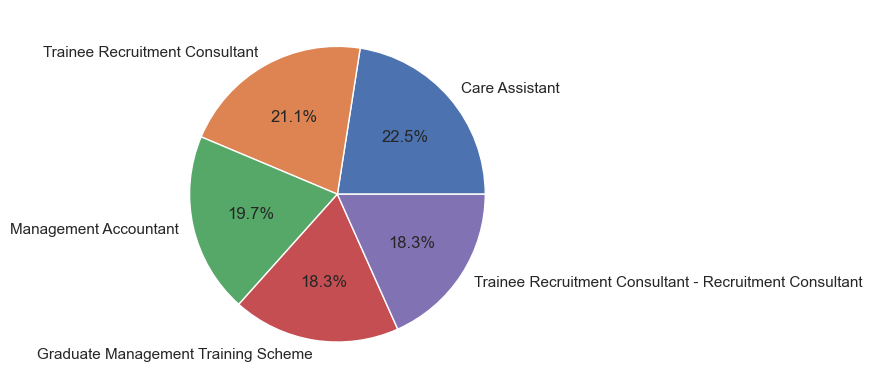

In [22]:
df_jt = df[['job_title','state']]
df_lon_jt = df_jt
df_lon_jt = df_lon_jt[df_lon_jt.state.str.contains('London')]
df_lon_jt['job_title'].value_counts()[:5].plot(kind='pie', ylabel='', autopct='%1.1f%%')

## South East England

### Let's see the most popular job categories in South East England

<AxesSubplot:>

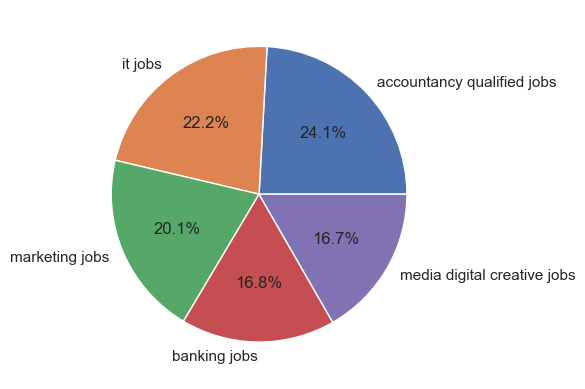

In [23]:
df_cat = df[['category','state']]
df_see_cat = df_cat 
df_see_cat = df_see_cat[df_see_cat.state.str.contains('South East England')]
df_see_cat['category'].value_counts()[:5].plot(kind='pie', ylabel='', autopct='%1.1f%%')

### Let's see the salaries of those categories in South East England (Anual salaries)

<BarContainer object of 1082 artists>

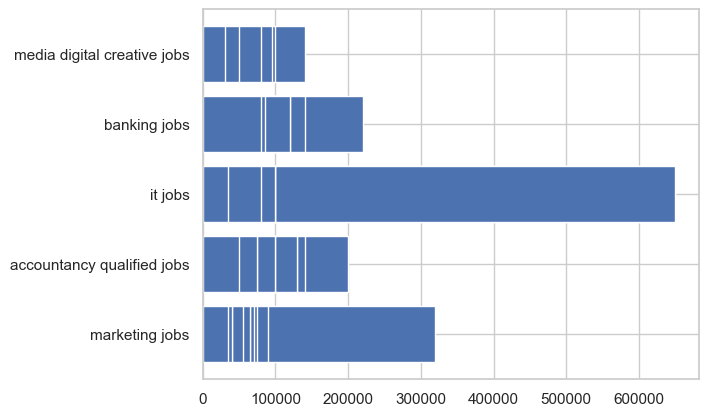

In [24]:
df4 = df[['category','state','salary_offered', 'salary_value']]
df4 = df4[df4.salary_offered.str.contains('per annum')]
df4 = df4[df4.state.str.contains('South East England')]
searchfor = ['marketing jobs', 'banking jobs', 'it jobs', 'media digital creative jobs', 'accountancy qualified jobs']
df4 = df4[df4.category.str.contains('|'.join(searchfor))]
salary = df4['salary_value']
category = df4['category']
plt.barh(category, salary)

## Let's see the most popular job titles in South East England 

<AxesSubplot:>

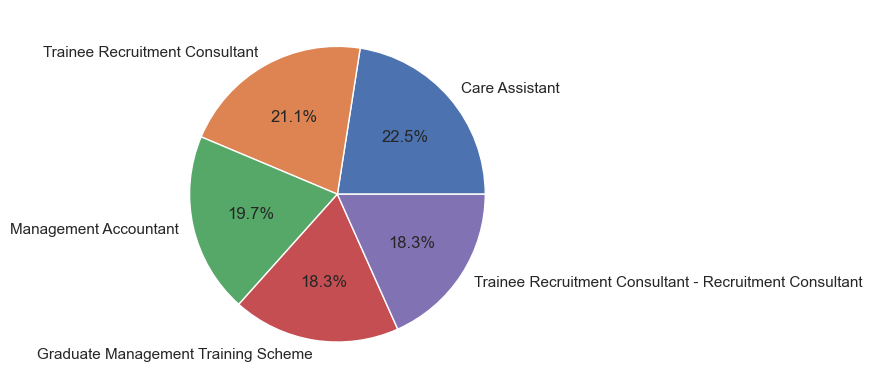

In [25]:
df_jt = df[['job_title','state']]
df_see_jt = df_jt
df_see_jt = df_see_jt[df_see_jt.state.str.contains('London')]
df_see_jt['job_title'].value_counts()[:5].plot(kind='pie', ylabel='', autopct='%1.1f%%')

## Job offers posts by date

<AxesSubplot:>

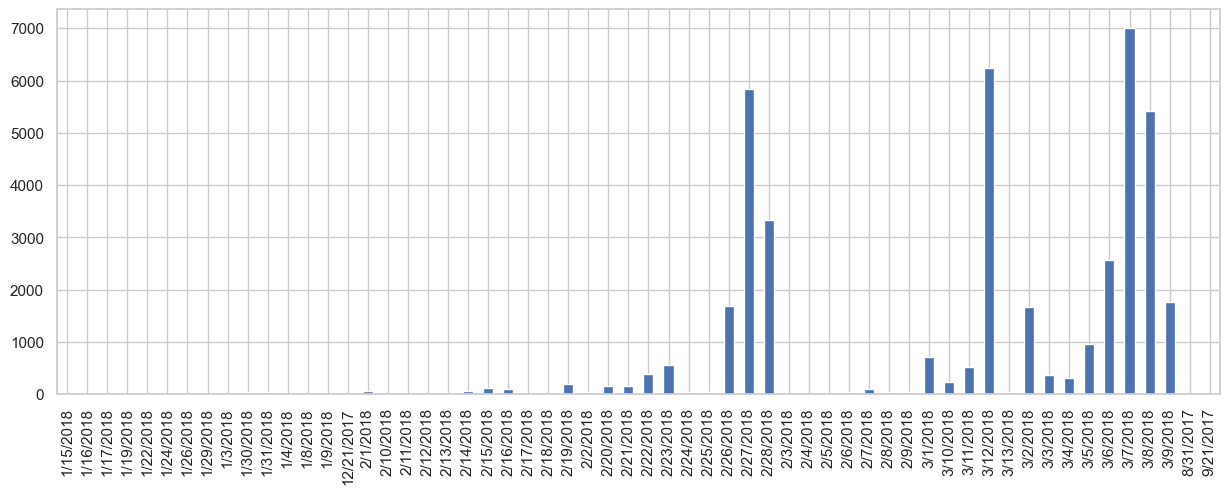

In [26]:
 df['post_date'].value_counts().sort_index().plot(kind='bar', figsize=(15,5))

### Type of jobs in uk

<AxesSubplot:>

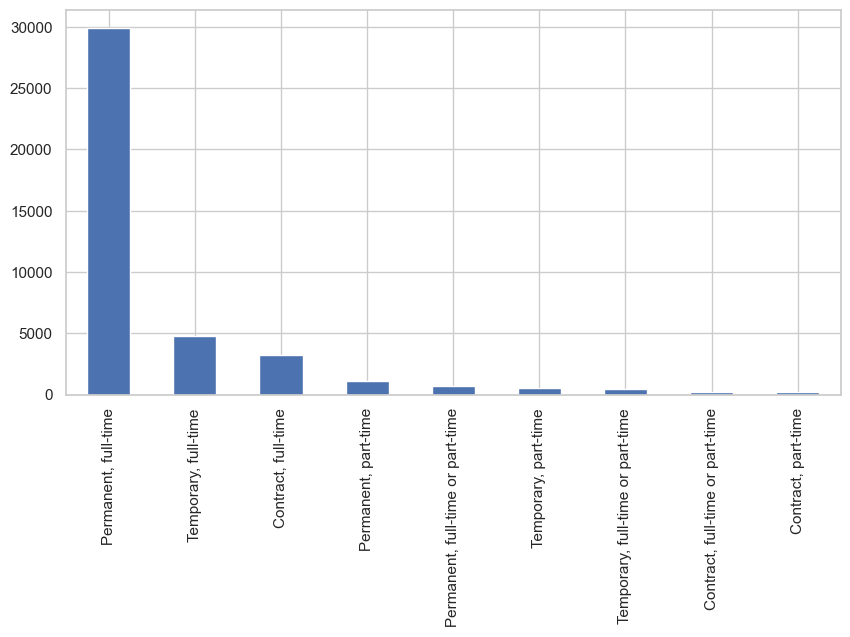

In [27]:
df['job_type'].value_counts().plot.bar(figsize=(10,5))


<a id='gdb'></a>
# Graph Database
Although I have experience connecting databases with other programming languages, I was not familiar with graph databases. I researched about them and learned how they work, but unfortunately I did not have time to build it, however, here is the diagram of the database so that it can be built in the future

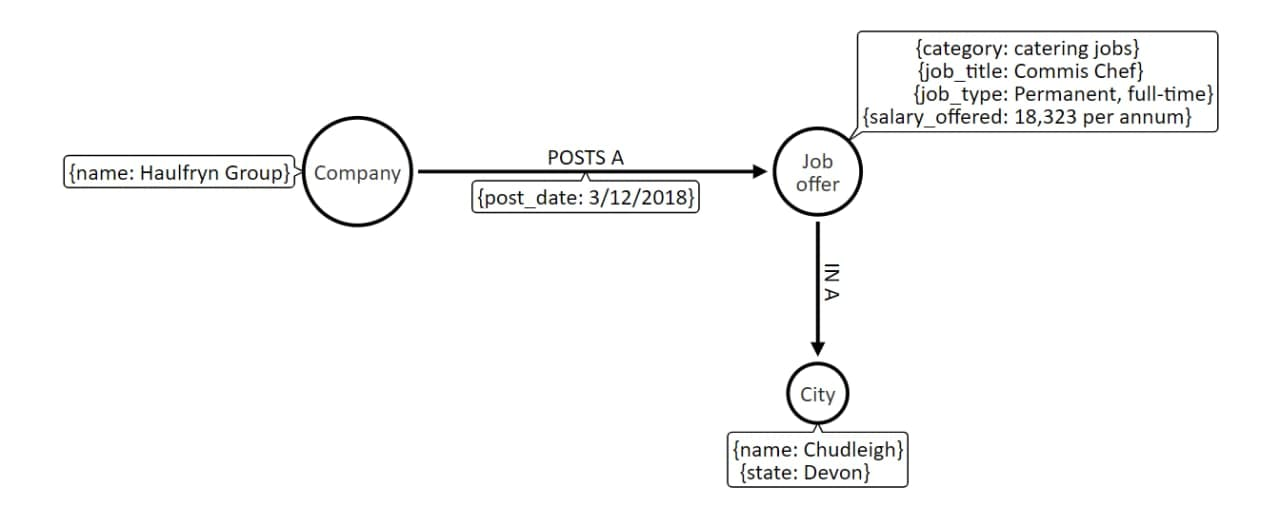

In [28]:
base64_data = "/9j/4AAQSkZJRgABAQEAYABgAAD/2wCEAAgICAgJCAkKCgkNDgwODRMREBARExwUFhQWFBwrGx8bGx8bKyYuJSMlLiZENS8vNUROQj5CTl9VVV93cXecnNEBCAgICAkICQoKCQ0ODA4NExEQEBETHBQWFBYUHCsbHxsbHxsrJi4lIyUuJkQ1Ly81RE5CPkJOX1VVX3dxd5yc0f/CABEIAg4FAAMBIgACEQEDEQH/xAAcAAEAAgMBAQEAAAAAAAAAAAAABQYCBAcBAwj/2gAIAQEAAAAA7+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHwjQAAAAAAMpb0AAAAAAAAAAAAAAAAAAFRtwPh8/oyxe+j6vgZ5Y/N749a33z+wCu2IAAAAAAAAAAAAAAAAAAFZswKlvY/KCkJHS++MjH2at/GJsXx0N/YgbtU9ysWf6Z2AArdkAAAAAAAAAAAAAAAAAABWbMCna+EPswEglZeq3verFFtWl7Z9PWp/aOUzur8ZrctYBW7IAAAAAAAAAAAAAAAAAACs2YGjHzr5fat7sr8dOUY++hp1yfbGx5A5zgBW7IAAAAAAAAAAAAAAAAAACs2YGvz2a+lR6hrcvkpr5S8rS5j2vy7Qk8LHSfJ2Fj567AFbsgAAAAAAAAAAAAAAAAAAKzZgYcsltuEv8At89392qXSaom39NOV+0Y0L9RpX2qWzXugBW7IAAAAAAAAAAAAAAAAAACs2YELF2zRkIz5y4YwFhAGLKE2s/Nz5ff1hFadkAAAAAAAAAAAAAAAAAABWbMClYx+E5buY2KAlazb7NxayeSPw34Cfwqdri7LZuYSmLR++7E7X12ZKyAAAAAAAAAAAAAAAAAAArFnBTI37bmzZK3XduR+E1NQ8YksPhVrf8ADSldSLu8LWJ7b+kZvamhYYSQsgAAAAAAAAAAAAAAAAAAKts2BFSr5PqiKres/Pro57cBltNaMlvrKDz0BX59hAWMAAAAAAACD59Hfe2Xr0AAAAAAAAAKdHfap3ak2r7blr5zA7WO59s4q3W6h62/Z6VnbKvtalRtF65RY/pXLV5Upzfu5W7IAAAAAAAEFx25dH+2NR5zZuoAAAAAAAAHkXqz4qGpJQ9nrNorVjQ+3uR239/nBzFgo8hqSGMJY/YKV05eaoVh+ujnr57cPdCuWMAAAAAAAUWndpyBUeddzAAAAAAABjxrStG3XIfretrSmTz3zxmYvTHIePfPRjkeeh56Yym2AAAAAAAR/H+4AFXp3WQAAAAAAA/O/cpYecdju5+gAAAAAAAAAAAAAA4P3gAOI9syAAEd8Plvx+hvbklHSQAAHC+17IHD+y7YAAAAAAAAAeVX7+HoPPTx6AGFm4p2wAIug9SAAFD+LDUmdvL2r9RAABq8m7Gru9q6NsOKdrAAAAAAAAADVj8pgCOz3MkVp2EQ3wsAQGlqaly1pkA84f3EAAQU7R96NnPvG7GpbgABULdze2zijZ6Ud077OHdxAAAAAAAAADVqkdsxn1y+Gp0WtQc/AWDCrzmzqWeAkoTxO17O78U6l8bPSvvhrbuPw3dG/wDEbLXgADAfKMmRkAAODd53+uZvn77j9DiPbgAAAAAAAAA1oeCtMBtyWh5I/P6xmGhY42wUK25x/wAZKE3fKtJSX1gbrpaMx7WZJnJVi88Q7gDytfP7AYe5NGV1XmOb5fT6Hzzlt8ETLc4sdkj4ype23CyuG9yAAAAAAAAADyo/Q89PPPrnhg8eZPXuDIzs3EO4ABA1PpQMNDVnDH33zQkMM3yidv4b0XvxcxGbezoNGzAMeLdrrEdIVzYnrLr8e7SAAAAAAAAAAAAAADh3cQA4N3j0GtXYLaz0vjarHQNPz4RXUJHm078bVTN6d5pZdSWhJjatgBxbqUuBwXu+YAAAAAAAAAAAAAAPlwnvXoCh6HSwI/S5vcM/vr70rWfhusJ3bq+f3+ejuau/ptr5fLatgB5wPqtoHnCOn2kAAAAAAAAAAAAAABW+Vd49BzeE7GA8qWX2Hy+eyeejwPQy+W/NADzl9b39mIdn3QAAAAAAAAAAAAAABqcSlOhTmlSKdfr6AAAAAAAAFVtPoAAAAAAAAAAAAAAAD5USE3LnOAAAAAAAAA84l24AAAAAAAAAAAAAAAAAAAAAAAAAB5xLtwAAAAAAAAAAAAAAAAAAAAAAAAADziXbgAAAAAAAAAAAAAAAAAAAAAAAAAHnEu3AAAAAAAAAAAAAAAAAAAAAAAAAAPOJduAAAAAAAAAAAAAAAAAAAAAAAAAAecO2naAAAAAAAAAAAAAAAAAAAAAAAAAAecQt7oIAAAAAAAAAAAAAAAAAAAAAAAAAPOHdb9lgAAAAAAAAAAAAAAAAAAAAAAAAAecOtW3fQAAAAAAAAAAAAAAAAAAAAAAAAAecOu1imgAAAAAAAAAAAAAAAAAAAAAAAAAecS7cAAAAAAAAAAAAAAAAAAAAAAAAAA84l24AAAAAAAAAAAAAAAAAAAAAAAAAB5xLtwAAAAAAAAAAAAAAAAAAAAAAAAADziXbgAAAAAAAAAAAAAAAAAAAAAAAAAFf4j+jfQAAAAAAAAAAAAAAAAAAAAAAAAAObcE/YfoAAAAAAAAAAAAAAAAAAAAAAAAAHlYtAAAAAAAAAAAAAAAAAAAAAAAAAAPOVwXrr8kAAAAAAAAAAAAAAAAAAAAAAAAAecA6/YXnDum2UAAAAAAAAAAAAAAAAAAAAAAAABzG02UOA9+AAAAAAAAAAAAAAAAAAAAAAAAAcN7lVdjCcz5d0aRAAAAAAAAAAAAAAAAAAAAAAAAA4d3GjbepjOVO4TYAAAAAAAAAAAAAAAAAAAAAAAAHGOx/D3GJsPCu7AAAAAAAAAAAAAAAAAAAAAAAAAMOBd/9KRAdWAAAAAAAAAAAAAAAAAAAAAAAAAI7ikvvQFl6iAAAAAAAAAAAAAAAAAAAAAAAAeAFSg+jZgHoAAAAAAAAAAAAAAAAAAAAAARcZIvvhhke/X7R3o98e4RNvAAAAAAAAAAAAAAAAAAAAAAEThDzGtIxspoSMXqRNv8AtE1G8a/3rNlhdy0gAAAAAAAAAAAAAAAAAAAAACv6cFK0mwyFQkb9AS8NVJ3Vjtrz6fGyt60gAAAAAAAAAAAAAAAAAAAAACC3NKXx+nvmH0z+GbHPzH5Vren4LXtIAAAAAAAAAAAAAAAAAAAAAAi5OrfWDsOh8NyWgI6yakrD7OcZdRW7IAAAAAAAAAAAAAAAAAAAAAAIuTqWtB7+lrZ9Br0XryHw+CxfC7Ct2QAAAAAAAAAAAAAAAAAAAAAAfGr6uUizwGeGWOWCAmtk+NoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB/8QAFgEBAQEAAAAAAAAAAAAAAAAAAAEC/9oACAECEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEoAJqAAAAAAAAAABKJRFzuAAAAAAAAAABLc6kGpNZoAAAAAAAAAAZ0lSoqWUAAAAAAAAAAZ1FShFlAAAAAAAAABKuVSkKhqAAAAAAAAAAAAAAAAAAAAhQAAAAAAAiosqChKAAAASgAAAAIspKRUoAAAASxQAAAAAAAAGd5sUlmoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEoAAAAAAAAAAAAAAAAAAAAAAAAABKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASghQAAAAAAAAAABnUqWWUAAAAAAAAAAAJSUlAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA//xAAXAQEBAQEAAAAAAAAAAAAAAAAAAQID/9oACAEDEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlEoAAAAAAAAAAACWVKAAAAAAAAAAFy3z0Sy3KgAAAAAAAAABc0AiyyygAAAAAAAAAJUoIKSgAAAAAAAAAAlSgllAAAAAAAAAAAAAAAAAAAASgAAAAAAAlgKJQSgAAAJQAAAACUIoAAAAAJQAAAAAAAAAJUs1mooAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlAAAAAAAAAAAAAlAAAAAAAAAAAABc0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlEsoAAAAAAAAAAAJblUqUAAAAAAAAAAAEpKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/8QASRAAAQQBAgMEBAoHBwMDBQAAAwECBAUGABEHEhQTFRZVITEyVBAgMDRBQmBwc3UiIzVQUVZ0JCUmNkBFUjNDU2JxkBdEYWVy/9oACAEBAAESAP8A4S7K/p6tzWTpwgvcm6N8bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHXjbFfNw68bYr5uHTc0xZyoiXANNe17GuaqKipui/bLEgxpY7SfJCwh32Mliv6KH7qHXRQ/dQ66KH7qHXRQ/dQ66KH7qHXRQ/dQ6KCvAFzyBA1Gpu98fuuUFpow4xhP9LSLEib+iMLbTokPmXaMLTosPddowvTrpYnoTpg6WJEVETphadFiKvoihTTosNfVFEmnRIaehIwtLFhelEii06LCVE2iCRddFD91DroofuoddJE92Fp0SHuu0YWlixPdhJp8SGq+iMLTocNrfmodLFhfRFDro4nu4tJFie7C06LEVyqkYSJrpInuwtdJE92FrpYe3oii3/j0kTZP7MLUruqGJTSulCNFRFf08N/6TY4dl06NEXbaKFNdFD91DroofuoddFD91DroofuoddFD91DroofuoddFD91DoldAIxzHwwq1fWmFOe2HZxd1UcS0lAF9s8F/Zs/80mfHzh7PDU8K+0ZGCYyxuIdKyHGZFeQpd2gjMvlWESQWrmCIx6M7CHkqSZZ4RayVGmMAp2hxHJbSf3gk6IdBjmHTtlzOKjUkOrpaQFdt1tlkbIMtsQEA82Uou1UUHNYkimPZHhHjCaXskaDKmPmRYk2slwVkeiOpstAKykVoa2XJkBexHpW3sexSenI8LoZnCK0GVhPCqJTIMns55+zHopWBE8hHI1jWq5ywMrWY8CgqZvSGfsyVNytsNSkfVTViDfykk3OS2kTJKYEOEc0YoivVszImRCxo7IEiRMIJCdM3LIXddhPUBhrD9BwysgBPpLeQ+FYx4Yo6kbIlZHFqlq4qgknJJBuJKzJY0/rgljGhniIjjCfnSJ0Lx0U94JZEZHMZyLHI53M1OzVV1XX9bBxmumc0sjDbMC2DkwzzhwZdfJhHK1VElJeLAl5CMVbKmPbZmc9pMsrVqoE+Mwp1mP5ACOZ9rRz+prShVQkTscQMhcbqXudzOSKJq/JYb6sh/PJv2zwX9mz/AM0mfHziMN1M+cibSIRGGA+/bKhX1PctiGkRwhMErbu2sptQhq6HPCxJTEMtBF3y4MmPGs0jd2mYpqYEgQ8jpCxZLCyZUooywqiB3aOqsK+/dJRnZEFdyrGJlhe7EKr21whv0kQcjHovdSGknr7NsiUGxOXJZtGGLAmBHEnDlHLSAMPIclK8L2sIQHI7Lwzody8EFF2vhJEcp5Pc46mHGgFMJ5GR0W6gknUs+MxdnnAQbVx+7IKHX1ZqieOWJjQk1bjspkC3DNjXJbHnKgx2jTwpuJ2Sw5BQxgFGZL2BvkLLc8ezWHIgsHo9VG8L5E+vg2PPJHrIwGJiFiAQXuIsFWowsaQuQYyXsCcg4Zke6wGQFzk8ogdgLTsTnqZZkh0Lbh84dfE7Fwll8qwzKi77idqFFmriuHWEaOp+gP2xAlKbIbulLHgygR4JXGIWrs5FNKvepqJzxmsDPC+LWJCxmEK2rJL1JKNIdqikWzKe0NJ7fkGpFiLhUYQMcgEY3Z8kTTlX5HDfVkP55N+2eC/s2f8Amkz49nXRrODJgyWqoTMVj0pbCteE8UM40hITlEQ6KioioqKmlVE9K6jyY0oDDRzMKN2+ztTsYjSppJwZ86HJI1rSuq6iFUBKgXPVSPUhSoqKiKi6WVGbJZFUzEO9ivayRTxZFpDsiPIpYw3tGz4FMBjkR5WNX6E9C/GnR4cuMaHKRrhyGKNWJhsNezGe0s5UZitVsezrm2EJ8bqpEdHehXQo8Csix4IXtGMTEYNrpUZhxR3HYhiIqsYnwZC+sdBWLPtFhsOvJz1s+qYZaeK9UJFCz9X8jhvqyH88m/bPBf2bP/NJnx5UqPEjlkSCIMQ2q574asjYFNkyYjCjesk/YnvSgSrr62Cwko8ZCoyuvJZ50upsojATRxu3TWO3N5AxgEiNVMJFjqZXugywzocaWJd2GGj26uHy2Vkt0RrFMgncqV1hknghsiRDhSofSPcTVzLuxWuHsrhBGAjXqMbnH8ZUzjoxC93GV6EyuwO6UWuiRSxQEexVZeSpcOkm1sHtwTHsUq2szoaydL5d+wA8m1Bi1TZ1MaxuAdZNlDQzyzbIlWaBTVkVDynjVWpXX8x86VW2UNgJgg9s3Q80uVpYt46mYkFWNUqDyO1DYVzJ1YwUWc9WBcW/uTWttXV9aIj4ajVSDzG5kVpLONTNQEfmSQk+fCPPxQqw2FWSQjgkBf2s+zmx4MOMoYkhQl1azOgrZ0zbfsAPJtQ4rV2dTFsbcPVzZQ0M8lwha7IsaDBjOO5seQwbaq/kllWUKzjMjyIY2lcqZpPSI216GL3auztrB1pKziAo4sIwVgueFLAg4eZ1Eg6oMJoBozHfI4b6sh/PJv2zwX9mz/zSZ8cg2EY5j2o5qpsqMVreHFsJFTYbpgmIWvto8mnua6K2SrYDI5o9bV2kq8k3dhEbFesLpAR4cHMIVA6k7nC5xGlYh6mCldWw4aO3QIms3kD7YBR+rnYrdQau+ZiU+iLV8r2RSCAS2rLZExiZEh9QaucvOBYU8+R1li+L2YmwSMLoGLFrSSgPxOLaMIchRSeS0gRaePArIrR87WSRzIw5cU8YqbsKNzHaq1zCiiDq20Y7EIU5AyJ0G/ZZV91HhBPJSM4MmLArbSXcyrmfEbGcsNYwAJSWngCNUrH/ALYyKxijvKybKPjzgB5kizEIXVTXywXmSSSi2DKfHULoVPYixW0gvBtIM+WrGdz2PNhq9h8x5+p1cVN1YTVUVIIElp0UdnKislwzRS+lhROY7VX4xooYq1lEOxCBFYGS+DayLyinHjjTsQGQ+lqJJr+5MUe0WVXjA19bi8iDFBAk4XBkkEiMSa+rlplUKawKJFFXuCrpjWnzmqG/ZzQ1kgrU+Rw31ZD+eTftngv7Nn/mkz49tdMrjQQJHIc8oisGPuHE5U+UDpRvkte05xIiImyadYxW2Qq5Xr1BAPM1NS6SulHUpVkq/wCnUaqrIclFCQ6FVF2b8Vyo1qqq7Imo+V45JKwQbUDnuXZvyb3NY1XOVERPWrXNe1HNVFaqboun5BXMs0rUUr5Ho5tAqq8E2ROHHRJJ0RCENYxATo0IrnIaQj1GkGxiz3SWgcqqAzgk08gxtVz3ta1PWsufDhoFDnYPtSINnxHqrWOVGq5UT1U9wO0CZ7QECQRVEQWGLu3Ifzyb9s8F/Zs/80mfHmHSZmtTFaisWGA5XK68fEusl7ZrOwhQwlTRbDLA03fzpUZRoNDuhTpE6ZldKaseMbz05Xc9Ja2iW8+msjMMUImHGbVpEt353B7C0QXNBKrNQ7iWG6tYFiZqsEFskD1yG/7qpJg+y7axs1YxgLC8rr6BAs5QpMeYx/I8ubvkvmlDkECEgSvYKNDsbW5rKCxr+xEM6sJKZMTaKf8ADdqEdlnhEaniU0o014uRhrHJyQJ46fvqNAdHiDUsgeYyy4veTgnAaTAfyIaxn5TWUVhYyJUdxlQahDLtMvrplWxx4ZknuUSDrLO4DkcimspIpCrCSUIltlc2sK965DWvK0yNWBZ2dy6+gVteQLGnhPM98C9sYi38a1Iwz60bDNL48MMAZ630AvO5nPAlWV9IyU1ZXyAhCleE6llTrifjuSxJEobJUFXjebDh2QKSH1M5DseAajRyKqLt69tY5GtmZFkpH2aOYM7e0bEv7E2BkuHvasxsUxEc85D3mHHL7ZIpHu1QT4VczI5U2QwAG2xUUmazw2+MEk1NmN4GGY0iz/ENcWldJthSgmmDCoyz8hl5Bb1cGSEAI4Y7+1iW2XTqqdMbIiAdBeYb9WuZICuoXtOCISyZzqbHMoJPuD1j7SNYtSP2zJGPFbHyDIIL0c575CSObDE2bkP55N+2eDJvW2H5pM+PkBgxsjxg53INnNJGr68US5yLK0YRCRTRY4FeuO5OSrSmNPhd3q1BKefQWfe1fPq5QApEhPjoOpqZcObPtraTHWUdrB6bMgcu6zAb/wALWospFrAt6o8XnCF4ntzuAaSejGA/JLkkWM/WXxHsHi0aGVAObaCaN8SluJFxHsrg8VemG5oBRqLIap8oNSaA6GQrzIkmNeObVpHmhaoytWYpguJHKnq5mq3WN1ZqmlhQTPY54WcqrPpbUdwS0qTxUeUTRnDZ01xaY7Y18mRF6qQ3lRcgqT2dMWGJ7GPerdnWtOeXLojMexqQzqR6PpDvynvftWditY6JyJiGQsqH0w5lekRCcyFWoOmQQbLtB9mCC8CtXH3Fsr0x3sWPPjBFywKzK4IgQklVr4otmtOGqOzI5VopGKIsEQEaLHjN8RsMVnJYv3bp6ZHTY2WI4kZ8vlZGgvjtM2OFpno8qMaj3VdOaJZXUoj2OZNKx7U8KZIynl0UefDSC9CoF7KOSkzHz9qPaBHUb0pKk1e+0Ur2OSTNedur+ndb1EqEN7RvciK18ioup0aqSaSGh4s1hnahVR499cWLnsUcsUZjGwKKTFqbeG8o1fKPJIxXYtNZX0PTSQsn1o1ax1eG9E8hLQsBGIz0MxFzDSMgkjVHjLYO5H4b6sh/PJv2zwh6MrLD80maqraXPsLQSxxsixi9ij/gS1H32lWonc3T9vz/AAHjxztRhgsI1F32DHjR0VscAxMVd+X4MgnwYFYY8uOhhIqJ2ciXWxgwGExIPWyyPaGLDXaGBqR+wTkavZOCJ72EcNivZvyuIERFYrxtcrHczV1ZzW19dMmuYr2xwvKrYEts2FFlNarUMFhETUTJaiXcOqgHUh2icRy2eQwK07IxGHNIe3mQVVcQbaO40Rzv0HqwjbO2i1jBKdhXuI7Zg6rIK+1SQgFIwgF2KJM3o+pCB6SxtK/kGeyvYdaQYiCkGI9N0HU3EC4jOPEI5Ua9WPb8qK4lDyJa04BoN4FKB+nIjkVFRFRU0EAY40YITGMT1Nw31ZD+eTf3lb5ti9Lu2baBaT/xSeNtEL0Q6uZI1/8AWuc/0ixMqt0HjjF9UvHZQtVXFLDrHlGs5Yrv4BkAONpQlY9ipujv33ib3Mp7FWDV70s5yo2iJYFobyRDTlsiyjuUOLSIiyCDNaWaTkDzGiz7sgAsnwbe5lEQ7EU2/wDjhq//AKrfVtdkjxX2EG3upRhFT9bcts5uTwq8FmeLHJBe8uhllU+SxYh5xzQ5kPYa4lJlz4s2yOZ7hS5T3xmLqqBYZJFlWRbmbG3kGZHFcGlXWGxpUuSZDhmtA9bbHWDyPGA97WjkKkn9I9vJnWdqF5r5ooZljhSVZ5ETHKcjiHiTiWTAK+9NOoQVleKys5Lp8p6kNR2VlGszjaO5LAWK96uPFtbPDrC5LdykKaIciggQJcumxl8ewJGQAo5CtVqORUVPQqaZGjxs9gBAJgxJSm2bcdd4pQtC1hLFsVGyWYW4attWGaRlmknnnMsFsUjqtcOM+R9GsXfIZkVyO1EjLUrGPXWVcl7JjY7ETnVDiNMJad8tEzuoMJxfrawZyN76jyGOZZNmKSYmTPsluKCHEnkipIeZCrFNNp8mWtfPky4xoL5DdBurSwgOshlyDrn8zwMsZF1OscdijmHgOlxHvkpBirDiiAsgx1Y3btLq2UQ582DcXUg4Cu2faGs5lxQRY9gSKyTEI8y1j58C3v6kk88kIYopAHiS7TDwX776WsoYmlRkidKdk2ODQz2iPDO8jFmSky+5ipIJ2A6oZGMVb1MRHf8AfspZQ9nsZLSzqJ+Py3W8qQs2Y2PJFcveDKqM4WKYzxFEoU+HDfVkP55N/eGT5lTY1G55Zdyr7Auu4gZ65Uh711Xql4PY5B2JPV842oVDSwGo2JWRRfBIixZDVaeOIifwuOG+H2SO5q1oCf8AOVgWY4k9ZmMWbziTdVBivFKLOOkC7F0U7SKi/vMhRiariPa1qetZOY4vEXY9zFYumZ9hpF2bfRdRLermpvFnAL8TDPTVzHJ7K2c1U1Thc+Tkla9ZEcpJbjMJDxx45zps6xJNMgHAYrsFe6vHWrfSeiE5qhA6mE63WxcVVVYix1GfAyPrnVa3slIKbKMDqli3ILPtl5hxlCjOIEF8+shxQIVJRJomAesmrpIsSKQnZDYNGDRuRUhHsYOZzPcqIiLihwllJXXUiJGkvcQoJGLwiUgagL3CCJ7HosymHKs6qepla6F2vKw+NnbPkzK22NCdIVHHZLoUlRa8JZpXujSWH7S6pQWwo/64gDxyIQJq+rnAe9823LM3Zy8ngv8AssmA25lNric+0Z9GTp6YArAwmwVHvpfUqadilutqO08SO6hgVCmpmOGJYrYwbQ0OU8TRlU9JJrKq36Ip5VlO/Qcd9JNWFXBDcyQnihQalrsc6M8uYWeWTOOPkWRAwy2rmEZFys7UeRSP1OqbCQRho12eMVBox2qSiDUtkv7ch5EgnOY+U15p11jbGPOLYh17asx5Yk00+XOJMlvH2fOHFpUNSBr72RHhuerkAWnYSzrp6nfzRBPGjdEwd6wpNeO8kjgFc96R+5BrYVsztnbxI7go11IxtxYz+2XeVFGBWJjgkxpKLqH8iB7LtbXG0lpWkFOJGlw0/VGr8XSJYTJ7555BpMZAkV2MB8N9x9S/k5OXtLOlZYLVcxlZ0UpkhNKrpWaieMZOSLDIwj/hw31ZD+eTf3fnOcxcXiIIOxbAyfqR4hw8l2klL/LFcYxF52AYNgmNGxqNa1NkT42Y4DU5IBxORATWp+gbFMwtsXtUxrJ1VBovKA/7wPIBGCQxyNGNjVVz7jirLlye7cTgPlH/APMDhvmV+qHyK8eJF/7UTgxiQU/XrJPovB/CnJ6IhmrqdwXji3LUXMiOTS3HEnB12sxLPgJ634tmVFk4N4ZOU6Ju8GU2Rv1NJBJySpaKpS10+QscEHGYgejAzl6zkzRqe1T6VM29avp9L43T69RpG5qxPbp9L43T69RrbNU+tT65M0antU+uTNGp7VPpfG6fXqNL43T69RpfG6fXqNcuatb7dPpG5qxPbp9Kma7el9Pr/GyJ7dPpfG6fXqNcmaIntU+l8bfS+n0vjdPr1Gv8bInt0+ts2RPbp9ImasT26jSNzVie3T6/xsie3T6RuasT26fS+N0+vUaXxun16jSpmqJ7VPpfG30vp9cmaIntU+l8bp9eo1tmyfXp9L42+l9PpG5qxPbp9L43T69RpEzVie3UaVM2+l9PpfG6fXqNKmbetX0+kbmrE9un0vjb6X0+l8betX0+l8bp9eo0RububssqqF/66SoFUwmhR6vcrnEI/wDduT38bHqaTYHX2E2Y3h7jUnI7I2W3qc6uJvGZ8jnGIRcpqyB5EbME1Vjl4XZVJf22N26q2dD3az93zpsaBEPLkkQYRMVznHk3vE22fHiufGpQv1R43T47EbFr4zW/83/Ec1r2q1yIrV9aZfw2JDOt5iz1jSxLzqHAXw8on2Jbua4k/nTnitYwbUa1qI1qbIn2azcpcqzSBjUd69PHXc+okUEOMGMBiNEJiManyXFCsNR3VdlcBNlQqIfVXZhsq2JOCv6BxI9P9DZ21fVAaecdBDV6MRa6/qLR72QpjCEYm7mWOTUFUVBT7EYiKm/JAsYFiBJEOSMwl+sLKcfLLSIyxE4yv5GobOsTAV4jWzGPa9WK0WUUB4RJw7EaxhvRjiVlzV2qEWFKaXk9pFVE/wDbVZb1lsIpYMthmDerHL/o+INnMyTIouH1b15EfvKdQ0cGhrAQIbEaMaelfj8RqA+PWgMsp05FaRO3bjtzGvKaHYx/YKz0p++5BxxwFMRdmDYrnLGlZlcBHOhSK6FFM3nCzoc988qtLDzxqbreVWlh54ibreVWuizzzyq10Oe+eVWuhz3zyq10We+eVWlhZ555Va6LPfPKrXQ5755VaWHnjfXeVWuhz3zyq10Oe+eVWuiz3zyq0sLPPPKrXR5357U66HPfPKrSQs888qtdDnvnlVroc988qtdDnvnlVroc988qtJCzzzyq10Oe+eVWuhz3zyq10WeeeVWuhz3zyq13jkNQeMlyWHJinM0PbT5TIcKVJeuzRCc9V4QRVnTLzIpPtmMrG/KZfUtuMcsoS+t4XKzXBq0dIoJEAvtwzqn+hzwyAi1BVG96NsgryAHKt8nr7MVZJhxogCsc/h+AMmoPaGGjpcyUd5nAhDDmFzBjL2QZlcjypWzC41GhVF9Vt6VhGDBPzFg+2x5UG1N7MWspppcwdbJrUC6RCkodAUN7EsJkiMatfBsxMRThzCy7vo5HIRGFkKkcTqIldS5SGBCkhfGnwmbJ/or21HUU9hPXbaOBz9cHqp7w2WSSv0pEszmMd8GUT5UCqdIik5CIYTd59xX1zR9Wflc/2WkuIU+onHgSeZwhP31T5ZVMr64B528ggRo9/wAFlXx7OBJhSG7iMNWO1wllmrLe8xiSvpCR5BfvzIv2Da/0pNUxWhxepKvqZWgdtj9rOsq5kuRHYFC7uG349nZxawDDSVcjHmGJNWVlFq4b5UlXIJqpvprmua1yepU3+EVqJ91Iq+zcjxRRyFfVZAlpNOIMA3TCI8ayfiWt9WVCD6sy87/YFVZNW2khQCZJGXlV3Iq/FvreVUDjyWAYQHatYZc1ViUgC/QyxiPeuezgswe4lAKj0IBBovC+I2Nhlcv0mUhdWNnCrQoWUXlRVRrUrcgr7A3ZCFIYTl5uX5FURUVNcNt4Wc5RX/Ucrv8AQ31QSzZXIMzWdhLYd3wLjl9VSZS0djHFHkFcVwKvHZERtjJPPUllLZs6RLxvI7RBRLi0ivhIRj3Nu6glk+sUZWsSLLYddW8W5KgCVU8QCM35m1FBNj2h7WzmDPNIFAJq2oO9LOuLJURIcbnc4FvicI7IRayNEhy40oZmE/0EDiNj57OVWSj9LKCZR6a5HIjmrui+peMk1Y+JKFPWeQxmsKgpAxWmBtttFY53w5lOjEipWMfvLecCsFIkAr8q6qe7swFhtGErHsmTsnnxfTEfAaLnLY1psOj1oNklvAJjARGOZHC1/tNY1F+G2TujjRWmb6EnNH+/Mi/YNr/Sk0+VIi4NDLHjOM/usKctkeTBxGkSsm7PceGNhuSzp7+nEtrIlAnc4ysyCyRJFioLm2ecG/KObaW0yqwwseWsc8840M9It2PIlqG38pYpYvbuemQWNNTZX2sh8slYVGBIG0tgSIBIpMhkkeZjZA2QpqXBpiz3rFcBGNi8Qe1SjB2KMUvXxeTWWkzRaQqT4lSyMrhc6300LXQYxbWeJXA5kjAvbQmIZIVZcntocggglyCfMBW0BBHex5ZsVhFUPb5lcC7R7Oeljpz49HPAxS/mhsJXaMJMaxHVl+uOSZ7LyWWxJFYVjH3Zbg+MCgHcNspnVn1Cj3Fua9572UAUeaUYG4nZSrHHoEmSqKZ7F51p0Q2YZKY7OY4GhYBIeQT33oqufTtjPfGIYZKJttOJYzpNxJ7CHZSmCj14Li6p33PfkoBiI8gRRr+dPJgx+1cNJin6hnWykzPpEO/sO7ufs6qLdXFZNkvvpQXDkHYBJc991w8FPlPQZXhYR2gzw90sl2Q2RGKNFK3OwQi0FhMpYM0MBVH2z8B2XC6H+n1IRD5xBEb2BQHkCk46RYkiRy7qIbna7G3JSLcd8yEk9ishBnnWNjMxlsaY+K2bFM8qxY1sW0sKp11K6YLGER5LWzZi096S3LKizEC01glnUGrpa2h5CFksCYV1MTrJI2Wll2jG/wDRLaWkjHKCQOSo5MmUAb3qKfAuYsPvSQcMsBd9d8T0x4kXtnd59V0KOCzshMar1crWom+JqicWsiX6Ni6ymt4lnvJZaWyEGAvJ2TO5eM/m4ddy8Z/Nw67l4z+bh13Lxn83DruXjP5uHXcvGfzcOu5eM/m4ddy8Z/Nw67l4z+bh13Lxn83DruXjP5uHXcvGfzcOu5eM/m4ddy8Z/Nw67l4z+bh0tNxj84BpKXjH5uDS0nGXzYGu5eMXm8fUqu4vRo5pMi6jsEJive6sfxWsSKMVq0ZUCM3J3Nxk84BpaXjH5uDXcvGbzcOkpOMnm4Ndy8Z/Nw67l4z+bh13Lxn83DrubjP5wHXcvGfzcOu5eM/m4ddy8Z/Nw67l4z+bh13Lxn83DruXjP5uHXcvGfzcOu5eM/m4ddy8Z/Nw67l4z+bh13Lxn83DruXjP5uHVyGelzNDLVCzO3chF4cUvEOGgynlLGrv/BxwTagrP/xK1Sq1amArfV07PhcIavR6jark9SuYJ7Va8bXIv0NYJGciNaif8exCjmuQTEcibb/Dn/p4o4ajPbTpv35kX7Btf6UmqxHGxOuY30qtUFqaqYIrvGqyKr3gfDOFz0sahsufVTFOrViPe9GFxKQpbBsW7PGiTHOeYLMaYyJjsdJSr3W9rkValq3bbRDLukZQciYxEf36yQRSis3bkZDoraM8DS5Ic8cSoqDZXHbcFnrPMonhaNI15UNt4go6mUfJJEbe9qWW1aSEplHzqiq6fjhjzw2EG0fDksjoB7oOJx49dbwZE00ls4riEeuGyjDgNl38gzIZxvCxtOg7yTaKVdywxR+zj4yMFJPquqcqSiGepIkdI0UIEdzdmNrd8FqGx5F1PahECWWUUVtZUNr3WCoZX9VIcZdUdUlRWR4LTKRBb/pW2MjnzWWEWcaDOYzkQ9bjUmPaMs59wWdJYFwmaqKdlYGYLtVIh5ZpC68ISQskRId9IBXlc7mBPxeMeFWAhyHwyQHIsUsHGiw7h9oezLLO6P2LtY/QWcqtmoK3kw2GlyUKLJokeHj8Gkhifu54RAZmTd6iIip67OFriFB6nDLoSe0kdSa4VzEk4dCZ9IHvFq4x4Vm8B2SCRpQF3CeLTz2Fes+6LNarFZyJip0idElyfu5V+bvqBJY1koZOVIQiDawFagbOXO7VVU42M5L+lWDjlmFhHF6iW0umY8Z8qKSZaGkhjP5wiLjx+smGiWpow5SophsxwbKyqgpJcqQpAzI+TWtPZQpvaqix2vTlDWNPmsmW1HoEAWucjlRrVV3qRNcL0WdmWT2X1edUT47nNY1znKiIibqrcjvJyKaookNE+oZLHMUXnTHo2u9M1/lyNrvPNf5cja7zzX+XI2u881/lyNrvPNf5cja7zzX+XI2u881/lyNpljmWyKmNxdNsc0b6sbi67zzX+XI2u881/lyLqcDJ7xI8KxqwRIKma+S69rbBs2BaVABvlARRPEttmXoVcejaSxzPl2TG4uu9cyb+h4dja6/MU9eOxtJY5mm7UxuNrvLM2oi+HI3o0lll677Y7G0OzzJE/RxyNrvPNf5ci6WyzX+XI2u881/lyNpJ2ZtVF8OR9La5oibuxyPqltw2ITKoXgkAf2cgHxq3EqOtmnnhiMWWYivefXF2tWRhxip6wHYTWC2DJ+I0p991SOg1+Cyso1bGU51XbmRrWx8ha+WGLKgSYhDf9LSyHy8onEkUkqSsZo+xZjMyMNLC3nQSsK0p1dLjZEMkkIJECVFU3oC5cnCk88INfKOYJkYRPglr31xpisZ6WQG/vwomFG8ZE3Y9qtVGUuSV7OlrbeOkQabCY2Lmyeq3rdOi5sqqi3FdpYubbr/fFdpYma+b12kjZunquK/ToWbfWuK7Sw825W/3vXa6PNfN63SRM183rtJFzjk3S4rtdBnW6r3xXa6DOG+nvet0sXNfOK3ToWbenmuK7Sws084rddNmyIid712ulzXzau06FmycyLbV2umzbZV74rtOh5v9NxXaSHm23ouK1UTSwc35VXvit10uapsqW9dpYeaecV2lj5v5xXa6DNmqq98Vvo0ldmyoipb1uhUtseQB1zPDIYAiEYKWBkiKYD03aRitVOFMpam7vccOuzmEVzPlM3t2UmMWUpF2eolYzXB6oWFjKzCJsSYVSfHu12prT+jNrF3NZjVQq+6s1RXC3MR8xsR4gOeqBd8JSjCJ5CvaxjU3c5jmPYj2ORUVEVF05UairqqtI1rEbLjI/s1c9vwBkRztcoSsIjXqxV+CTKBFC8xysGJibufWZJRWclY0Wex5UTm5LWxDWV8iYVN2CYrtpF3BhVoZ9iVkRjmIrtGmRAxVlFOxgEbzKStyahtTuBBsRmK1N1ZdWoKislTSoqtCNXbTMopq1gO85g4pSDa9RBnwTw2zAyGPAreZCwsooZ8hIsWwG8y+lrbC4rKxBdbLGFSvRg0lzIsKO+TKOwQWJu59dkdJaGUMKahCNbzKytvHTZc6EWK4BorkRW0qomX5cn0bQvkbiAKyq5sEvsHC5i64S2T4Eu2xacvIYBnEEmsoiSyBr5McCmWLMGdw5JiX0+pSPDlCFFkocpK8Jm5NdlUT2jeMPK5KmbKxKfFaEiG64hUZAiVkqbD2iXCkE9H6pQlHZ3zyCc1Hymq1dXVtHpqqXPMqIMA1drhFAPJNcZNKTcksqsH9m+I8KRjmS1mWQmfoc6MOlXYxrSBGmxno4RmI5F+Sz6aXKMor8VgP3EIu8hYUQMGJHihTYYRoxqfGuWoyktd19Kwz6g2K12GQZSAKZAwWO7McubR8Pq40E4nHYIKtfLnZLTSqqRLshyY8qS0BAAl3t7PtOgtEgRYMlYzdJkd46hmvRjOthzulOa4dKnYXeFFk6zUSORyvxaNMBUxFk2L5KPAJWJqNMyK6PbnhWY4kaJJJGEHGZMiNhIiJNjRCdubnNSX8yZcmqB3yThkgvKyRhTZ0GDcTi2hSABOm84PG83o22bL4LiLs9a16W5rCslR5IxweyesgMpjXgeigab0boMsmSfL6MttWvrUEhWxNZH/eFpT0zfYeTqpGs7q4BKG1mkAjzjiKwboohGrooyja9nYs9BRitczglhsRB1o3oc+Q/wB5XNNTJ6Ro/rJOreTW10STOksGn6tGqpYEqtwRoDNUfWT2K8WbADHqas4WIhI1hEUOs8rITIY56BRZL50RqkzcQSUwledBkFKCUCQJkiwyitLcQe7JAY7+mCAiRM2mjVridXFE7VTsuW5Xt/CD8lxMoZlZYxcxp27GC9Op1imSwcjqgzIzkR22xR/GVdkXWaXUrNr6PjFO9VijLuctVXRKetiwI6bCANGN+zd3URbqsk18pu4yt21iN3LwW7NjV4qpDITcJkVFTdFTb5HiBm4scgKCM9FsjpsFnDLESU0N9rYoq2U30r8hbsV1Nar/AAhm1jib47Vf0g9KZhuGo4rH7GjOYEqeH7aZLgPs7ERo0QqFGx9BbQp8+TTzgDHML2pRRaCbX1rhQZ6JMedTlNFxUigvuvkDcezF2RNVCHp4QgXNnD5WNaMT2XNIqIiW0JXL6ERmPW8SVYLW2QRRJhlM9iYcdmPxqxs1qmjSlOMkCit0vQ21hPARWRHg7Ksx6bBNZAWUF9bLMYqjgUuSVwQwo9tG6NnoYsiLZPtIBwzkZEEwiHDYglFjOZDl9gffdpEx+4m2NfKuJwCMhv7UI8eCaVa3VvIE5ivN00dMqqbu2iSIEOTFEAwuQiurMkLQSoS2EUUtWtYE1HS5RVpGj9ZW9Ixf00x0BpFhcWxxua45uxCl7jeQz7kU+JPh9MBv6kJKWys6aXAupQHkIqKwjMeuZhYCW9iAwIhWlYzKKO+uUaCNLhijNKIqasKK0soELqZgRz4klDhKKitpdhAm280BEhqrxDpCjl5TkEkDkeJGAFz0/pyzKv8A2g/JFEM43iKxHDe1Wubc47eYDavuqFHErnLuUOJ5zR5GBvYFQUr6wPiS5kWEB55R2CE31vyHOLTKJC0WKieo3+gsjCMKh4tB2TYkwibmL9nM0w2BlFcojbDkjTcJsdzO4wmWlBlAnrGT/oyIk2JNjskRZAyhem7X/GzDiVAo0dCrdpdkvo5MMweaeb4iyVVJNevOIPyBgsOEonpu17FYuosfL6eOKDFhwZsUKbCJ1OY/pf4aq9JNzlE2Sgrtd4Zx5BXaWxznyCv13jnPkFfp58yMiITG6p6aTxZ/KtPpthnPkFdrvLOfIK/XeWc+QV+ksM4RNkoK/XeWc+QV+u8s58gr9d5Zz5BX67yznyCv0k/OE9VBX6SwzhvqoK/XeWc+QV+ksc58gr9Nn5w31UFfrvLOfIK/XeWc+QV+u8s58gr9d5Zz5BX67yznyCv11+d+Q12mSs1H7GO1bN9U1XJilnTJj2OmzSoQy/JOY17Va5EVq+tMl4T104yzqaQsCZplzxXxT9XOr1sYrfU8HHCEibTqKSJ+n8caD6lXOXS8U8qtlUePYy//APsHD7MsmOyRldq8If8AwUOOU+PxUjV0Vo0+s77PXuP1V9DdFsYzSM+hZGFZnh53y8YmvkRvWoKzjEMDkjX9WaKZPW+Dn+Izk/VW4UX+Db6lcm6WUbUrLsZiNVT3EVurXjFjEPdsNCzCfwJacSM4VQwo618B/rdinDmnx3Y7/wC1TvpP+9JcWCVj3yYoSo1qqusctsNvurdVwAf2dyI9URERERPQn2jsKOos2ck2AEyam8IsPlLuyMUC6Xgfj/mEvUbgtigl3MSUbVXg+L1So6LVB5/+SIiIiJ+9pPzY/wCG7XA9URMl/GD9z8n5sf8ADdrgeqImS/jB+5+T82P+G7XA9URMl/GD9z8n5sf8N2uB6oiZL+MH7n5PzY/4btcD1RG5L+MH7n5PzY/4btcFPYyX8YOrEnC1LGV11xLZI7Z/bMq38MFnw1hXEt8nqGIFPuck/Nj/AIbtcElRGZL+OHVnmwVmmragYTShrylNWVVS+aCdbXYrGxR36pPuck/Nj/hu1wU25Mk/GDomPURXvISsive9d1VmP0InjeKqjNexUc1/3OSfmx/w3a4Kexkn44dXMC1qbaAtPdHGs6U9HhZmUuusItXcRAIc5WiGb7nJPzY/4btcFPYyX8cOp2J2VzNQtrcvSOIrnADV47S1W6w4Q2PX1k+5yT82P+G7XA9URMl/HD9z8n5sf8N2uB6oiZL+MH7n5PzY/wCG7XA9URMl/GD9z8n5sf8ADdrgeqImS/jB+5+/zGgqHFhT5fYGeJeVOFOVUdEl33jLQXblGrNR5IpMcUgSqoyMR7V+53i3jHe1Es8DN5MLd+uHuNLkWRxgPZvGBsaRpERERE9Sfc85rXtVrkRWqmypi2IwcaZYpHXdZMlxN/uce5jGK97ka1EVVW94t1cMywqWM6fK9XMk/jHdbEDFSGFdLA40Rv00msN/6RcTstoioLJqJeT6S4/lNNkUbtq6Sj9vbH9zL3tGxz3KjWtTdVvLm7z+6dRUr1FViX9cbGsLocZByRI6PPts8/wSYkaUF4ZAWFG9NnNyvAZ2NSPEWKPeLsf0yx8IzCLlVWh0RByhbNOL7mOLN6aupg1sZV6me7k1geMhx2ijh5f7QVEed3xPXqwCuAcQ40qP6K2f62IqKm6fcxk6Jb8WaeCT0ijoz4JdzZyLE8Cnjx3vjonbmfKvgV0h0tlcCSxzeQkzJ66DaQ6+QcCKUb3EeCZFkOI0MgZFZtzIGTHMpUEVj1G7lenGOEwuMBlp7caS1dYnLWbjdRJd63xWfcxYr0XGaE8nqMxnwUcoEC7v4cp7RkLK7ca5RKjSKCegTsIrFGjtWYoqZPjrzMFyOjSUVbeUOiuG2P8A9vKjKN2sahvi1QlL/wBYyqYmuLxmCwwo/pKcWsGC4GI0Y3etIrfuY4vQDw5dPkcZvpjFRhNUtnHtauJOA7dhho7U6rqp7WNlwxH5fp7mqAxHwxQhNC5UVWTayBNaMcqMMzWLu1L2mLYsrorWDSOM7CFRE2RETXEuUt/k9NjEJefkKjzajgZGjhAP2Bsaxv3MXFVFuK6TAlN3EZitXWN3s3h5dmoLnfu4j9xGAUJxMKEjXjeiK13w5tnUHGYjxCe0tk9NhB4ZYlLiKfIrnd1jL3Vn3NZHjFVkcJYs8KL/AMCdycQcEe9at6z67/hE41xQ/qrSnOAqaNxtxtrdxQ5T11Iz/N8n3j0FM+ON/wD3sT4YMiSktL4/Vzt+bb7kiz4QXcpZQmL/AA73q/fga73q/fga73q/fga73q/fga73q/fga73q/fga73q/fga73q/fga73q/fgayqVVHgdhFHFkTZL0BHRlDU4tcVT3xQrBmBZFK9lnUMTZkuO1Nd71fvwNd71fvwNd71fvwNd71fvwNd71fvwNd71fvwNd71fvwNd71fvwNd71fvoNMewjUcxyKi/T9xF7KLDprGUL2wgc5NVeNUfd0MsiBHkyCgY8pVx7HPJIGnY7jq821HX6djmONbutFXb6fjuOIzbuKvRdOx/HFam1HX6fj2ObqjaOu0/HcdVdkpK5E/i7HMc+ikr9LjuNtRP7ir99CqaSKVCxKqGEiep8mLFlhUMmOIw1VFVi49j/klfrw9j3Lt3HX6XHse8jr9Lj+O8uyUdfrw5j3kkDS49jy+qjr0TXh3Httu46/S49jvkdfpcex1VdtR1+lx3HvJa/VLHj1eVT6+InZw3wmSUD9xGYrtjNun8Yz9KdR44wrV5VZXoqLQSK2nxytPLlKxslBK8lbk9JZHfGhTWEM1u/LKy3HIclY8iyGx7Xcr9TruqrewWbLGLtUco9MzHGlE86WY1Yx3KqQrWunQeuiyxkjKir2kHKsenyUjRrFjzL7LQ2le+xNXodHSgsaR4sku31MMSgEhZUgzQRxwoWYDMEsm4iHFzIpQ12VQYUm/bbWXKg7R7BNNcVoY0aU+UzsTvYwTz2MOPLiRCm5TyebsmWOU0UE5YZ7EY5CN9KRraxfjWOyusIpT2jBvfY5FTVL2DnS0G97VVrLG1ASnHOhW4gjeRnLIscgp6hRNsJqDc9u6Jd5RDm43Jn0056tYUSdtCyWgmyuhjz2Pkbb7NZ0uctYFz0ZLrSGK2J/nuR+Up9xOV/wCXLf8ApX6t4SzsOaJhyCckFr971WTcZxpxAs5DToHMO5GxuU4y9Gojtjt1d3cmZUZA19nEgtb1AugMIZpmBIViPRBOcmosYHjyzL2TedK8OzigmnxnPARN90uT7IJg7QlQ0mXxzII7CBCGZUvupUUbGJPGFjirm4jDZTWYxOI2BOYYzY+X47J7EQLIJCFVEaPFwC6vLiKNvOtoRiryqPBqguy9jGs0e/U62r7DMMWbDkIZGJJVXUlhW1wsmiWRWMlPsZL3shoiYliyI3lRLYejrLiZjfKS9DWodgFC+TCDFxOYobJs1p7JhVJbXbqbLpJmCC/ngBHtLiCDw+ILqAH55PO9cjAIc/EuQaN5Jqtbq3GsvMKKO16iUMY8lxIyN8eSNvKW/cTliImNW+/rWK/UYApFFEAqqnaQ2NXVPWlr6sMOecJ2xtuR43xJbWSBKErfqEfChPK4rooVe5Nld2ANxr2TNx+xrsxoRSINqPVERXDCISv5Btbzu5naZDhCIpBRAjevrcghIRxUGxCOTZXKiLpkGAIivDECx6+t7AiYr1YxrVeu7tIALRqJomIz/iOHEEjFHFCzkVVbokaE97SLFE4qeojo8ZURqAGjWu5mtkRYshGoeMIqJ9AVr5QNgOjmEjttp2OWKWsmxgS4yOkNYj2UePCrAS2Gew5JJ1OXTxCerFexrlYu7VFUSPEJbY8hrmtjKAA4u3jw/wCUp9xOYf5Yuf6V+qn9l1/9KLWavRuMWjd9leHkakq1h0YYMMUIxSkZ+qjZNk9jDr6uRFrponnmCY9CX6ChgMSrnoYyqjIz8qYetszRoMxsuK1UfGxvJzSaBk20AcLRRmkJJi5ZENIAE0CdFSQ7YBgXEclvKq0AbtQhYRX5sWQyuhsBJOBSzgDc+6j2WMxFtolvNkAC5qyI87IokN0cLI8mVJMLtGA8X1qQuqcGS3kksjnHNt40SbXQ1YR5ZjnoxC5lDGSR09fPkgA9WFkzMqqYkaulK55AzHbBdWZHFsZpoDosmLKYPtOyomDjZLkYGMaNiqAiM+IH/P0v8ob9xOYf5Yuf6V+qn9l1/wDSi1nURi0RZnqkQlSQF2SrAcsEssU1hGtVwpU9LqVicKRNAUho9kA+1/bS5DKk8dZwawziJJLjcMr5OT8jJvZnAxBPGCRbYCakACQObGiiY9kGLUz5MFj335CjK1/ZBs+0t5Nd0pk7ELCdtnavZWQjIIj2inx3uS5tCZTBdU1kCWjDvY0576t6PIxzTvsWQnwBgQsCirptTdMjpPXrERFJiKT7OeSxnxiCfEithDSjsX0FM+llwJbpYXHazUapmwo+GAKJecUwjy6OEvjiAZBO5EqjtV8ALJeZW8gqbviBCIPxQ/5+l/lDfuJvYL7Cnnwx+2YLmJqBmVPXw48S0IaJLAJgyDs8rwuygHhGs17M7FY/VbmGKQoggEvCHUabc7M8xBv+6JpmeYg3/dNLn+IeZ6ZnmINT9qabnmIJ67NNMzzEG/7ommZ5iDf90TXj/EfNNMzzEG/7omkz7EG+q00zPMQZ/umkz3EETZLPTM7xBPXZppM7xBGqneiaqcgw6uLLN32UxZRecpEznEvNNeP8R8014/xHzTXj/EfNNUxFssgm3gwmZDWI2MJf/lO//8QARRAAAgEDAAYFCAcGBAcBAAAAAQIAAxESExQhMVHSBBAiMkEgQmFwcYGD0yMwUFJgYnJAgpGSotEzY3PCBUNTkKGx4rL/2gAIAQEAEz8A/wCyWx2mdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdqdrqH4zcAnCnUKKJgJgJgJgJgJgIVFlEQKyn2ETATATATATATATATATATATATATATATATATATATATATATATATETASpii/xMCiYCYCYCYCYCYCYCYCYCcER7AfjP4zeX4uXcCwlBRc4wpd2J4WlW16iDZsIjYBKSp5htMRo/b7JRA7KcSTHsXd91gFlYDGoeFxKQFgr+dH8Mdt4BuBvZ2h8AIUGDcDxAgQBFtEwtXGIIteUgMlHFjHFnQxPonqr/lmAZu2I3GVgLhTtDSyKr5bt5g2EbJVOlr1Hc7F9JlYCz24ESiNwiL2y43rKwBO6ekL9V8T8Z/Gby/FWDiUVzdNJazBYKeNY0fOKKZ0zLa+aGwyhpnRY1txziO+gb2N3cZSo6fZke/tFjKi4VGe92GJnSKRpBdEO4LwiwayQeY6na/8kpjZRUDvNP1KRNCRSQqLZZ7rSkCOj4X7MpUy7oalMAHETohYVKTqcrOqTpN2q1SIouScZjsUlRvlS6oSA+wtG6JgMgLJm4J2Ce6J3mQgocfSJXpmlckWCgGUaRfOdGGVTozVGLjuzpAtVKBbgvPvVKguT9V8T8Z/GbywbGxlbxYcXsoPWhuDY26ujVAocLuuGDCVXzd24sx6ie0QN5lxgpqb29vWWA8sm2QMrV70+z7ACZQYI1uFyDGfbYQnawG+3WtRabH0AtCpHY3AgnePqvifjP4zeWdwAj7nSrULi9ozY06dMDxMRskqUybXEapZ3Ac3KCegxyQJWqvm6wu4BOh7r+gRd17iVa+D1Cm/AQmxpU2Fy0/QLyo7djPbZJVeyoieLmU2ySonEGCp9J7UgfJ1a1wHEqPihDplKlSzXTY+EY7aX0Ra4lWoVqkjeQs/QLx2PYz22SM//wCiYjFkam3iIa30+H3sZVJI0bHf+qeBqs6ME+q+J+M/jN5Z3GcAtZgBC4psRvupaBxVYLfMlys06AUlqE98T2T2iCsjCveZqhIengbFrCZq2Dt4TS00NnN7VBUiPZKNPxNPdeehhaJ0pKPYG7NXiVcdh23R3mYqMATkSxXZM13iZAYqFIlx2sKeJmS7RVclZkvYvRKSnXAtTB8R356GFjE6SlHsDdmrxHuqM+4C+0wEb9t4atMI4XzmBu8BAAYm4AE4MaiLf6r4n4z+M3lpbcouxN+Eze2bbmK3t1W2YIQD1J0qtSH8EcCVOlVqv9Lu3l3+rMHUiFlS/wB4wkkkDw2wDfgLmEWs6wmwjHvMdwHkDxj95WE+J+M/jN5bjEOKoCjCBQGOQO8zR/8AL32zlUZBELoYi4ZI/Feo0VbBQRcTELenazR1sBQdWwiU8DTdJVTJnw++Y+04eIWe6GhhSRr9/SGVlDmox8FBlMdirEp2FLIi65b2hTEUGIve+9olMU7APgVMRbkqTuy35R1ywsQLxFwzSot90RLMEc7g/ER0yKF2ZdgiILVUxvumjCYC3VolGfYmOy6Ez0tTjmwBMQB8jlG6Mi2DDeDHTMg1QYEyFdqO/wDSDK21KQUXMoqE3HEqwii6hWG4njPifjP4zeWd13QWiG4vYxVYdINIeFt0qqWD3INjaUrilTRPAFppFla+DpU4FIPOoP8A4kxyC2ptOjBwt23s2c6Sr50i+0gYb4adtMgG0LvtPbE3GdJDYNhuIKRFZaaRt2ww7zdSuybc8jUzvCj6aoM87PPEszBoveGAIMNNzWwXwK7rzzr03Zr/ANUG9QUw2zo6knM7AXzgFrtbaYN4CrbbCjGti+3AziSuNxB4BoRcBgZSzwKIPC8G8GiG5oL2ArRgWpOGGLKZ0ZW2eku9oNzACfE/Gfxml7uzgAnr8LZY263UML8ReIoUf+OsgNmzGwFjMKNyEFy2U2DD8uzhCBcX4GEXseI6h4hBeHwDi/UgugCkAjKUKZqPiPGOMXRh4MJSQu7ewCVUKOntEqUWSizcA5lCmajWEZcWRhvDD65TckLsIbrQBR/AT4n2knbf+VZ2ac055IlUPyTpC4RTcH7c4/SmP/yqu7AzpxP8yjlmhYdBcF7Ebgs/fgotqJ7diu7CUTZjZh3eBld8rVqG/wDmEJ2JRQ4pbqoPglNaTFBkPOMpMaa1CtXDK0bpLl0snmGdAou4ug2tUZRtJlWmabFSSLskA09dURLlaQAn/EaLqUqL4B3gtoAmJ7GEUbKy4dw9Sj/OWVtlAUt63beDHAFnbdhbzJ0hmRP4qGMpG9A0RsGEG7o9NDl/M06S7oP6AZ5hd/FPyxfEBJXbN6bU5Q6M7dFHBN1nETY4IAJA4GVmydvaZRosehoVPcawxlOVmzqJnkCC37sytSYA2s4gPZJAEvsDlm2iX+iIzxs6+dH/AMI6RSbog7loDYhDYl/I+J9oLvadyOcUi01B6nUN/wC5Q7HV5jH7UY2Ez6kcHyPimKLdlgLFWjIKYVH37FmC9kIbgE+MtssTeBFum29iZbib3ib6ZbYzH0YzFm2ILeAM0b/2iorjJ9+BPdneJKNlLd7SLjAgqK7DzhluMcAs5TjE7yPCi00HuEAGzPwz4RNgrBFxxfq1ZdiFsoqK61AvENGsrZN2Q2zcEmx9JxLho4AxHBVEPRqZZ2biTAgdHt4lTKnecyl5hwjqECpwAEFNWwubkIx2ib8sxYknqCL2c2yIylu8Gltiinkb/wBUsLxAG3ixBBlQSwv3s4B3igItCtlycggA+R8T7P8A9zR/98UWAHlrH8P/AI+0WNgoEwv/ACrEOcL4zTNHne/qj98T/odHHeqGdIBFFv8ATAsXmiq880VXnmiq880VXnmiq880VXnmiq880VXnmiq880VXnmiq880VXnmiq880VXnmiq880VXnmiq880VXnmiq880VXnmiq880VXnmiq880VXnmiq880VXnmiq880VXnmiq880VXnmiq880VXnmiq880VXnmiq880VXnmiq880VXnmiq880VXnmiq880VXnmiq88WjUJH8zxt7u5uzH7O+80P1XAx95VPM+zzuAHUe+54sfJMT/ZCMEcJBuH4cHgB+22LXJ/SDLFWHuYAzazfwWIbiC9i3ANuJhp1OWEMgDcO0BBcEe0Gx6l8GHh+y+LHifqBODeI+3PQJVpPWqFDuLWZZqT/MmpP8yak/zJqb/MmpP8yak/zJqT/Mmpv8yak/zJqT/MmpP8yak/zJqT/MmpP8yam/zJqb/MmpP8yam/zJqT/MmpP8yak/zJqT/Mmpv8yak/zJqT/Mmpv8yak/zJQptSam77slJa4M9g+t/Mv7Ei5sZXTRPVNQbFx4CNtIs5ASJ5rm65SkA9Im/YNQb0bqq7Eq7LWlQC5XwKuO8kPg1XZeIwNq/RRb+pf2Pi3hD/X12B2M4B3wKXZvYFuZtVka3iDYiEEjMjcXta/X7Z6UODfbnunspiK2RwO4n6gC/aqHERRc7T5HgRULKB/TCRiXQ2IA8lAWd/Yolak1IkeUWsyhza4nBRUBvFPhVOHUBdmJ8AJWpmn+2HxCdXSELhHffhaYgBOAQcBKNIrUqYHIBoRvCyrTzR5SXGmiA3sIy5ZuRYGJSCXxO1Tj+w1O6xHX+Ztp6/FhnGHZVgdom4VKiA7RMbPnxnpA6/8AVBpfbnuincDSF2ngQ7gSubgMi5Bk4ToNB3pUCBcCoUEA8GoljHOVYWNrK0q7XIqAWynSeh1FoFDvIuowltisPOj7stIJQq1S/f8ASJ0Ck1Ss/wCbsAkCVlNKviLEZwHvK+8GIbML1KkNTYCr9+A2phl7dgPTEO6kg2oZRNisHiVNofCmVvF6QK1wpt4KJTIAZab7nlI2pIF3Bk8YuxXwpzwyyteUzYDBiBn96eBdGldlxp34ndLml0aqS4sUpvP3jDuzL2JnsEB+h3Xxxi+xTAfprv4ZTxNqoW5lS2Bz8UHhOg0mcU+BfEGW++SDcSqdqOo3pPOzJ7/8sO828T1NUtuSaSaSaSaSaSaSaSaSaSaSaSaSaSaSaSaSaSaSaSGpKrYnCruM0k0k0k0k0k0k0k0k0k0k0k0k0k0k0k0k0k0k0k0kTbk86TdifYvV7uu20RgDBABfyPjn7c90+EBGQ3zoNljAO9muMWmpN334uZjtqYUyktxOV5ux2Y2BmhRWYDwd4e4pHnQC/wDhNlAL2xN4KYqh037jH2NdwAYaaqLU/B7S27Bi1/6piLrpjecbCP5lFHJ2egsYRbEtCLE3N5Sscl4Op3w00pKqseCQi1tMb4wU1YgPvCOdoiAPhYY2IO8GMoVd9+yBumAa4zPcy7kAJ2IwnxJ/pnLqpb0hprSQg8QswXLH7mfCAbCKgAlt2EAsRnVWOiizDcWYd6Kitc7rqTumPf0ZvLb8xPNNdha/8v1VauKWfpAmtia2JrYmtia2JrYmtia2JrYmtia2JrYiVxULom3D94xmFNalFv7TWxNbE1sTW1mtia2JrYmtia2JrYmtia2s1pY/epv5bi7XPDr/ADJsPUouzMdwAlYCznhcQMPovTv8Y5vszsKQlVRZzEUWUHzuv/STP7c9BnSKObIvAETVm/vNWb+81Zuaas3NNWbmmrtzTVm/vNWb+81Zuaas01Zpq7c01Zpqzc01Zv7zVm5pqzc01Zuaas395q7c01ZpqzTVm/vNWb+81Zpq7c01Z5RpYLmNxM9Bn6PrPzP9R+4epmBNRQbZeQxsAB4kwG4IPWwsbocT1KwazLvBt49bGwAlipI4jKDeY53E+EY2UCC6n+qDex8FEN3Zb+hYCMMZYrmB90nvRt7MfACObAQqyN/BgIWyDq25hPhfVH+V+ob3Vd9pWpmluHdAMI2GwhGBcLVznSCwSmR7YRbIYDq+8fAT/wAv+JxPQPL/AHDKQuxg2odK0FEIKRqbijQUVqvVqILsTnKdMuAv/VCRaFJDgE20mAEamiaMYbhgB1GgKoqmlvNQyqCyJ9IbwUFpvRcELuAs00VMB2Ru/cC8HRuzjfuZ78oy9tyw7FjDazEe2XWrp3dbYl0n+VR/uYfMjC4NhF3Fn3U5+Sj3Afa0sCz8Fn/Tp16vcg9LhbCHaQM9whUuKtVDdaZVd+U7+nLjt9uJt0WH358I/Vf754o/1PibfhvgYdy/Vfc/PH3oh+o/cPV403FaJTKs7jcXlZCwFQixZLSolxUdt9xKK4ooxxuJ/hXCDxzM06R0ydHfvFIy3UnPIZCUqZVRkwMw+kBrbxeNSJqqgmO2qWFlPumOQlBCoL8WvGFiKNHmMqqxb3WlNWsqxKT5vHFiKNLYJXpswD/fnR1K4W2jfKSFTUdO6XvHRi+VM3lJSaeQ4gyghUZkWuSYN2SbxPhH6o7iDOAjmzeS5sB+H+E32XliG4PlrtFIx/M9LfU+gi0qVmovjwYYmay3y5rh5Jrbck1t+Sa2/JH6UT/7Saz/APE1xuSa2/JNbfkmtvyTW35Jrb8k1t+Sa2/JNbbkmtvyTW35Jrb8k1t+Sa2/JNbfkmtvyTW35Jrb8k1w8kHSjyRL4KFGKot/BR9WZ5hMANb+pIjhp2BCGrRTczez+0/h/wA5DxBh5IgjnEzSCZiIJ3I+5f0/aroG3e2HowQ3P4kdQYj9ReOMj9r+71Qe71Qe71Qe71Qe71Qe7qFXpQs0NXpNi/qd93VWcU6FEwuBSpN/lU/U77uo0xBTAIPqd93V0j6egDbLYN4nQ6wqKxbijWZfU77uroo0RX2vCMnPtY+p33eqD3eqD3eqD3eqBh1HgfU9xSfkHqfPjOCeYnqdJsABF7kICTMGIMIdjp6mj4CeD+lo4u7dbi4IgnA+pn8k4t6oekEimhbctk2kw1G0BB43sRDVVRSKgEAg/eisDbIXF4pvi3Az9fqbcgZowikG3bEcDacVg3ZoLpPzVDf1OOIBsjDcYd4VNwXr9Ci3qZ+5FNwR5G/H0tH3qr+pod5D5J2qD6kywEzEzEzEzEzEzEzEzEzEsHsz+f8Aux1F6fSKQ7D/AL8DATMTMTMTMTMTMTMTMTMQeoqvTWo7FgDclpq9OavTmrU5q9OavTmrU4OjU5q9OavTlOgiN/ECVFDqbegzVqc1enNWpzVqc1enNXpzV6c1enNXpzV6c81HzxOI9RX6acqEtlVqyxBI4rkBeAMVQ8GYCyxtxxFzMXD5cMCMoDYbN97yzKH/AEFgA08QrbjNwNR4Oj4fysDDdylMIngoNlguwcvuAtLE5YC5m2yX3ZMBZZ4uhYi0VWdyONkBNoE0y7Wta0VGdiB44oCYEenvb84EsdtvukizQm4L03UAz4nqKU97FL4t6DLXWxI2T0YQUM6tT2m/nQ8RRntJgHmjAtKfRAj3Xw75IgSzYHddooucNxMQ3YkziBTWfcRKxibttOOLtVSp3COM/faVqAqCoip4EkRaYprkzi4AlaqKX8hMo7aYNWtmVEHgMDENncBlXR/pM+J6ivQyWmNgETcTfxEWzAfpIhQFiPbLDs+zhANthALXJ8TFQBj7SIBtIHhfqVAGMAtc8TABaKgFr8LRkBYewzEWB4yoof8A9xCrKpXwsJ0ilpAMB5swCpl+VYRex9EVbYqxDEtPieor90TiWnRkBay7+AEamlwpexQgne8FMNV2ccSQIyKKqEi4O02tKioqVfSuBlelilSFbIQ/Ayi5R8XaxsROl1NOGpk2JUnaDOjpm+H3jcgARkxei77swYgvYILlm9EoUsqSFd8prlc2vOkIFLoTbJbEwC29dp8n4nqK/dE+66zoqktTY+GyYWqNRp1N5XjaUaZFYW7osdwM6X33ukdCl2pncCZWvhTdfvbIR2Gy8AZTQubK0rUjSSmgIJ3zoe9HptucAHYZ0zvMyjYRHFiWHfcRKRZa2bkhg0G0JkhMt/mJOAqAk+T8T1FVKFTeg8CAQYKVXllSjULN/RNDV5ZoavLNDV5ZoavLNDV5ZoavLNDV5ZoavLNDV5ZoavLNDV5ZoavLNDV5ZoavLKlKpfgBsSaGryzQ1eWaGryzQ1eWVUNM1LNkSFb/ALp//8QANBEAAQIDBgELBAIDAAAAAAAAAQARQVGhAiExYXGBEBIwMkJQUmCRscHRIGKA4XBywtLw/9oACAECAQE/AP5bbDMA/RFli30T2Xw6JYWjJEMSPAQ/aFxfWoZD2AOyDtnjV+AwAzQjmhcAoMusSrNx8lPZtuBFxAiGCJBLjCHgKeiMd1i+zI9G3NgonU+iGA2QZzO5lexfN/ZEsSw6w8kXAP8AV90WFrJ0MTsyLsIm9BnG/oh0LO/r4CcDkvF6K/lAav5OpJ7gTnThB9KqJU24SzT3Oc6JihHaqjkxKIYtIsoDQVXyQv1VDHYkdty4sCzweqi6dSyKnq6HoyGOZ9kMLlNQCOedVFfAoo8MRwgDpRR2bto4L/UeiuYamoQZrOp9EIkzb3XwgwO/shhZeYdX3oR2Q6YOtQgWB3FVgTuoMrXV2UtFohgHn7IO2bhH5V0O9RDojfxwI5E0CkIkI3clrwbQCF7oXk05yG7KJGlewYnWyBunRBBIi5HkhezRaq7uZAXyojMiqdgSYAmqioPkD5oQzDp7nyBRuIGZoHWcmfdEXrEgKeSiy9yAN18gefOwGroIQyPOQGpKF1KdgjF9DuEyN5eLuhdgpZcIjaia5lEnbgFdRlF4qW1Pq/VEIc8Y8JqXMS1Weqs3izoEMBp2za6JXWJ+6i+KrvbK+hVgQMvZCDyCOC7ok5ULSYAjJyoHUUQLWrJ+90LidfZQH4kRTeD4+EIj83xhZzZQG6b+aSWBKNxIUH+iRmBXhB1rPgLwD4FtObJRZy3f5Sh5UUDo1XToSQu5OQs0RvDZEefCI/6DKWoKHRG7+fgaG6gf7LvaWVLdWf8AOigTrQo1ZdYCZNA6GFnT8Cv/xAAzEQABAgMGAggGAwEAAAAAAAABABExQVEQIWFxgaGR0QIwQlBSYLHhIHBygILBEiIyQP/aAAgBAwEBPwD5tm58C3wSdG4Knwc2QiMUDcPIRUkS5Jm5PFFuN2zWG86KmCN6EQVIDBFUyO9giCUPIQj0c0IDRkY8UCGGa7IyHqjEtC9SC9mQvAyKiRmuyKspDV1dsEYHIeqmdPITEuMlKyZ03sNxad+1ge6psqheeG6cKmuykgQQDVC8kYkcFyBXvsjDUd91teltTMhU+lkfV7IEFQA4KLhA0w2s5k8UINZBcmRiczupav33X6ijft6ozaPujEAZ/pS1UtEZtQsqIy/LdSKN5CiApuh2tbKZIxLK5x4Zr2RhofZdo6eeCjE4FjxZeLAEoyRh1tO4TLXZAOnu0BRuD57KuSnon2B2UwBMgbJ7nTh2z2RuTXnNlJ8HU2zHBBVNjhVwfZcn6+PWEvdYO5pcd1N1Jk1nN1gpk57/APLRBU6o8ke1mVM98iIRH9cWPFc9kR/nB1TNS1/ag/1FBGeIAXg1R7WNyoEI/iyLtop9L7SZ/J+R+98xKETp86ggXAPwwfXayej2zI8igsQg7B/CyN50O6e92mDwDJkazZkWI6QM33snopFciOKmfI1NVTJC8h6lVyCmHh/FTAUtQFLQeqMT9hX/2Q==/xL4JBCgFK4h+wQOpi/HNJ710D1w1t+VOfJt6t9FqoexuoCvtU2OfR6C500cb2iblt458lPNsN3EfQ5wJWSPdaUq+xrYlrQXol2wfivdthoQaqATTxT5ICASER9f7+nZkzk5nJJMwkk+T90kPOnDNz5syZ8+/z+/3OmVEffnjm03HjxgsAAAAAACPVuXNn5e233zT9lxCSAQAAAAAjnc7GEyd+1vRfYv4FAAAAAGCEy8ycbP4SlAEAAAAAULwW1wRlAAAAAACUUaNGmb8EZQAAAAAAfAjKAAAAAAD4EJQBAAAAAPAhKAMAAAAA4ENQBgAAAADAh6AMAAAAAIAPQRkAAAAAAB+CMgAAAAAAPgRlAAAAAAB8CMoAAAAAAPgQlAEAAAAA8CEoAwAAAADgQ1AGAAAAAMCHoAwAAAAAgA9BGQAAAAAAH4IyAAAAAAA+BGUAAAAAAHwIygAAAAAA+BCUAQAAAADwISgDAAAAAOBDUAYAAAAAwIegHE1brZTMmSNzTFcpATe4K7BNViycI/OKSqWuxQ0EAAAAAAwrSQ/KbbUlLmBG7yq91DnktMmeLRvl4BmR7vZ62Vj/hhsOAAAAABhOqFFOWLZcVzDT9WdIfs401w8AAAAAGE5SG5QnzJTc3NywbqobNRTlLNslu3++VXa8sFseWZjphgIAAAAAhpPUBuXFj8jOnTvDumV5btwQlZmTJ9dNG+seAQAAAABS5tw5Od1xXj5yDwfK4DW9DlS665aXya5m9bitUbaVFMk8PWzhUlm7rVHa7DPDdL5RJ5Vrl8pC89p5UrRsrVTWNUuXG2+oae0sXSFF8+x10QuX6ue8IZ1udLg2adxWYp87r0hK9Pt2u1ERApV2erorqfXmrk1qS9zwin1qPrqkubbC3PTLzN+KCqltDps7K2Iee3QltVE/PwAAAAAMZx+9967Uv9Qkf7/jsNxX0yylv35L/k71/+3/Oio/+78n5aOP3RNTKA2uUW6SxkCtVHx9tWxsaBeTUc8ck1c3rpbV28JvmNWlwvWK5Q9L9avH5IwZ0i3tTa9K9YuBYAjuemOnrFDT2lB/UNpd4D1zTD3n4eWy4pE9PcLnG9vU+2xssM/tbpcG/b717f1rIt7QJPW7Vss3y2vMTb/M/B2skfJl5bLHn9JbaqUkYh4jZWRkuD4AAAAAGAnOyVuvqoD8L3+SF9o/Vo/CXfjoI/k/h1rl73a9JYdOpTYtp8XNvOrLy6VGsqRgSbEU5oYC4rGNu2RfsDL2DakurZZj7pFMmC2FSwpldlaGLLhtoWSbgfo5G+SgC58ZWQWyZEmBqKcYx14slQ3+xNpZJ1s2BqeoJlkohQVZ0rpxo5qffmjdKOWPHjTTKV6SLxPcYOmuly31utpc65LGbY9Kg5vHgu/9XF577efyvQL7WLvtn16TfZVF7jMBAAAAwHB3Tv7tpWNS+fbHcsENGXPppXLTzEmy8sZJ8vUrLpXgXaI+Oi//41fH5N9s7WlKpDYoV6+MaFIc+k3icFOluOoFqSpdKxWby2SBGyrSIE1evnyjQXa1uv6MJfJPddukorRCttXtk8oiu8i6GnfJFi/3zv6e7KyrktLSKnlh/RKxWblb6rfVi/cTyJ2Nr8qrrl8/f9u2CqmoqpOt913ELccKymSnms7a0s2y2TedpsZmV+vdJPte9KqRC2VpYY6MHZujwn4oKTcGPzQAAAAADH8f/nuLPNv+qXskcvXnrpSKv5olf/2laZL/59Ok8Kuz5NHbsuTmS90TPumSp/7lHTntHiZbWtQoS0ahFOa7G2Rl5snCfNsr0hpsmtzW1KgeObctFO/pfk37XrRNt5XcxfmS4/rHziuSpa5fDu6RgGt/3dxYb3sU//Ovy1/o+vquQAVe74ejrsvzTaezM3gddbc3k5IlWa5YJHua9+7qU8dqjw0AAAAAw86f5Ff/3h1qaj1xkjywYIp8Rvd3n5fTp1ySmnSF3PmfPyNT7CORs53yv4+kpgl2aoNyj5+HilFTm5/juyY4w/wfqb09VMuakZkpPXNyp7S3hgJmTlaW69OmSm4wfDfIQZO41fPbzQAjKyPYUFo9PVd8LaH7JGear8F0lM+hhS4/bpd21xK8rSX0+XJz+OkpAAAAACNE82lp9N/W+vRpearhT/JRywl59Lm3pPTFN+UnB87acTlj5XO2T/lUfvfHD1x/cqU2KPf4eahl0t9fh+puD9Ynq1wdLXB36UrboCyvqtaIFr7Dnx8WcFMqV+bd5s3MHtm1p1nNR7O8+mKDGzZVCmeHapcBAAAAYDg7/d5HEb9Q9KkcefNd+bvdZ+Qd9Shz/Gfkq9ePt6POfRL+U1Fnu+Vd15tM6dH0OgEZWaFw3OyvCg7KFN9TpLnFf3/rbvN/uLGS6cvS4c9PpbGSv6pMCkxW7paG8m/KokXflEddTp5ZXCHF19l+AAAAABjuPozze09Xz7xK/vvtM+VG3QC4+5T86+7TctiOss5fkA7Xm0xDJihnZfmu4W1pD17vGzJWsqaFknL7Gf8t0FqlqdH1SoHMNk9TwdrXOru92/f81mYJPj0VshfKfatmuwdWRtZsWVK2Q7atzYvSrBwAAAAAhqdLR49yfZHGyl9+6bNi7t/V8o78ZFeLPPun0A2/jMvGhK5ZTqIhE5Szc/ND1zG/uEcafUm5s63NBGd9Ey6vUXNTbaMEf5BpX53scv2Su1Cuc62sc/ILbY/if35zoKFnBXQSde4pl5UbD4rMXCM7DhyQA6rbV7dNShdfF7rlOQAAAACMAFnZl8o41x/uI3n55Tflf6puU0OnHPnEDfYbnyFXud5kSm1Qrn1Eli1bFtbtjP77UL27rlBWeJWw3TVyf9EKKS1dK8uWLpRF5Q22TXveUlnrPefgo+r9SqWyokS+/t0aF3wzpODuBcG7W2fmLwj9FJV6/orVFVJZukJWbGhyA1OjpTlg5+fYRrnfv3xWq/ndtU9aelaXAwAAAMDwdM14+ULUZDpGvpR/pXxTdYXZ0Wudb7jys64vuVIblM8ck6amprAudEuuvpomt60tlpnukZw5KPX1r0rTMX8T6xxZWuFd/6vydFO9VNc0BH9iasKCMvleke+mXZlFsuq+4BTlTGONVNcflO7CNbIm9GPOSXdd8XpZk28a2Uu7f/k0qvl99H75+rIqCRCWAQAAAIwEo6+Q/3qN9wPJfqNk3JTxMlF1maPdIL/LxsvSP0/NhatDpum1NjZvrex84Z/kvgUzxf6YU4Zk5S6Q+4rzQ02Wpy2Wqhe2yveWzJYsF5gnzFwgxT/eIbWVRcHfOPZct2KbbFWpeKaZ4ASZvaRMdpYtk8KF/f2BqN61NFTLiwF/wI9wbLtUN4Tf9w0AAAAAhquJN18t92RF1hp/Ih3vnZXTHWelozvi2mQZLV8vuDolza61UZ8qrh8DoCtQKd9cWS2tuhl42c+lanEourfsKpGve7e/Lt4qB9b298e0AAAAAGCI+bhT/rXunZ437Ip0yaWy9Es5smj6GDcguY4cCQytGuWhr0saa3VI1m6T4sLw+u1pCwoldfXYAAAAAJDGRmfKX/zltVLxF+PlhmgtsVV8zZk6WcqXzkpZSPZQozyg2qSu5FZ52FQaL5Af766UIt9trjvr1sqih181/QU/fkmq/NdTAwAAAMBIcu6cnD7n3ep6tIybcpn9qagUo0Z5wGVLTr73I1evypbKXdLY3CZtzQHZt+sRWV1uQ7JkFMrSeYRkAAAAACPYuHHmRl62G5iQ7KFGeaB17pFHFn9XXox1L6+MXLl781YpyUvN3dsAAAAAALHpGmWC8mDofEPqtmyR7fUN0mR+u0rfvTtP8guWyN0riuQ6X3NsAAAAAMDAISgDAAAAAODDNcoAAAAAAEQgKAMAAAAA4ENQBgAAAADAh6AMAAAAAIAPQRkAAAAAAB+CMgAAAAAAPgRlAAAAAAB8CMoAAAAAAPgQlAEAAAAA8CEoAwAAAADgQ1AGAAAAAMBn1KeK60+qkydPyunTp+XChQtuCAAAAAAA/TdmzBiZOHGiTJ482Q1JviNHAqkJyjoknzlzRsaNG2c+CAAAAAAAF0tXxJ47d04mTJiQsrCsg3JKml7rmmRCMgAAAAAgmXTG1FlTZ85USklQ1imfkAwAAAAASDadNVN9iS838wIAAAAAwIegDAAAAACAD0EZAAAAAAAfgjIAAAAAAD4DHpQPbbpFbrnFdpv+tU4eUn8fqutQYzqk7iE1/KE61QcAfXBok92nHHKPAWBI0Oc+m6TPuy72eQCQcgMclA/J7hr1Z+46ee6VV+TevyiSx9Tfx4qm2NEA0B833iuv6H3Kje4xAAwBhzbdIU/sdw8AAGllAIOyLjUtEZ2TZf8Tcsctm+RQh79GuaeOuoeCtc+hmuZQzXNdsHY6vDTWX2sdGndINunHm9Tr9Ou9ca5UVndh8+EbHjl9AIMjbJ/g3y7d9mpqV8K2XdsFt+2wcWzX6cfbv2+STcH99EMS+vrs97bJ7eO92rSwfX5YqyS33zfD3TS98d7xZ9Mm89cOd+/vXhN2THDP98b5a/JirpdID3G+u5jjgucndaF1KLTCxXhuL/sZ73VqnTPj1t0nJeakqEZKguu5b53Vz/XNq38927TbDQQApMwABuUpUvRYlSzRvaZG+V6JW/mjDih3PLFfllS9Iq+8ol6nw7X/iLFfHSWK1bjn1slcdZB5xneAKjlha6y9cSX+19UclemPqXFVek7UuGdmmefqh/ufeMIeqPRBTx295q57Tr33c7Jurnpe2MkXgAGntssn1D7Bbpd6XxKxbXtc7bJ9jjZXFs2dwnY9lOw/IbPWed/hfvW9+78nlSwW6XG2BYEOySU1S6TK+859x4pDm3Th7FxZ95wat26WnIhSc7f/xCxZp1/7WJG8a2r33LTUQWH/E3e4oKICtDo+7HetofTxoqbEBaBE10sMEhU873hC1Epg1pnI7+4h37jn1qkzhpJQwYxmTzXsOKl5xo67cZHZt5w4YZ/YoZ6k1oCE9zM1ssi83ytPbDTzI2pqVa88JkVTXIWCW8/C5setZ+qkyLx2kd4OAAAplbY38zpk2mgvkUUmTd8oi+xRyXewmS7TdYvtKeqv+rP/6LtmqDlJNic8t8gt6gDY47xoySIb0K+apQ5r6hR60VwV4fVD/cgKO+ipsfo56g3EvQOAQaTDy0N1V8m9+kQzTlvrjrpn7KnkkrvUCSjb9ZAyd5GYr0ntrYt1QNHfXXDn7x0XNHc5j7df955vAo13qY+b1hT93ZsnhfGOAT2mFRGGDB3CVei56l617kUU9ia6XmKAHdptCkvsdq9PEULfXfg+Qa0iRXep73y/PFHtK+iYPt2sH1PUX/Utiz3VsOck+3fvV+ckHeavt54lsp9ZElqBw3XsFzspu05O0dN07+lNd12xfe2N5qQIAJBKaRqUO3QmVmqkxDUzMs2T/AebubPkKtfr5zVNKhFd6urVKPXNu0d1vFYHyzvse+uabXW6JP7zJQADbEqR3OU2aB1K9LYZ67KNYO2L78SS7XoY6lDfn/ozd1a0o4Hjgk6v3LSkpsSsH7fcYi8VsoWwU6QotPLJHXq8V0vYl/USA67DnkxEZfcJrtA9hljrlgmqOrweCg+3F7WfefeoemVoPfIK+8MKawAAAyZNg/IUfW6jeM3pvK6X5trBkt118txFlOjb2mXXXC/43rpZlB0PYHDY2iDV2faK6oTSXS4R4VC1PcGcu25dcLtlux6GIlsURRPWEikONy2vaWuw844lkU36VWB+wq18ia6XGHjhNcHh7D6hn4VlpsWBCsnPhNdKX9R+xmvp5pqCe13ohqfRPwcAIDXStum1bVZUI7tNCyjvRly9XfflArareQ42vewjr7nTbtPWL3TzMM57gEF0yHcDHRVabCaJUhvUUSfPmA1/idzlOztlux5CVAi1rV8PSbWukfOaT/fgLsup2W2vOfWeb5rbu3Fes+1D1b3cXThiWv71LewYdKPc6wLxdL3yJbpeYnC4JvQ19mTCtTqz1/2G7xO8c4ZQK5T4XPPr/eHr50XtZ9zlAbZJd7R5DX0Oe3kaACCV0jYo6xMOeyMLdZDRTeASrCW+sdjdwEuduOh7dMw1BcYJ1ih4phTJY+psxzZ/cjd3eawoseZ7AFIjbJ9gL8dYUtWzlYm9lk8LXbphTlTZrocOtb+ftdvt+3XLojjfk67NrVrifdfq+bpG2B0rbrzX3QxMN4N9Rq0v+ngQx433upsv6Wm5GzLZSalwrG8O6TXLtiufHZfgeonBEv7d2ZuEuhpevU9Q49QK4sbp+3ol3srEu044dJ270sf9jFcpoNe5TYfcTU9d8/4e86pLYdzn2G3iPwAglUZ9qrj+pHnzzTclKyvLPQIAIBG6Bk6FC1knzyWhECN0R2wdXHWtcHiQBgAAQ1d7e7tcc8017lFyHTkSSOMaZQAALoK/hVGwdpqQDAAAEkCNMgAAAABgSEl1jTJBGQAAAMCg+Xj2HNeXWqMPHnB9GA4IygAAAACGvIEKxH1FgB6auEYZAAAAwJCkw7HXpauhMI8YeNQoAwAAAEiK4RY2qW1OX0Oy6fXx48dl/PjxMmbMGDcEAAAAwHA0UmpiCc3p48KFC3L27FmZMWOGG5JcKWt6PXHiRPnwww/NBwAAAAAw/Iy05soj7fOmK50xddbUmTOVUlKjrJ08eVJOnz5NWAYAAACGkckLilzfyHby1TrXh4GkWy3rkDx58mQ3JPlS1vQaAAAAwPDSMf1a1we/KSeOuD4MFwRlAAAAAHENREBOddgcDp8BA4egDAAAACCmZAfMdAuTqQjQBOahj6AMAAAAoIdkBsihEhxH4mdGdARlAAAAAEHJCIvDJSSyLEaulAbl/3f6Gfn96Z/J6Qsn3BAAAAAA6WrZl8+7vv7Z+dvLXN/wwnJJLxPHTJcvTPyW/KeJd7khyZeyoKxD8hunX5LPZxTJ+FFXuqEAAAAA0tHUm0pcX9+1vl7l+oY3llF6OPvpe9LcXS/XTiyUP594txuaXCkLys+c+Eu5fux/IyQDAAAAaa6/AXAkh7/+LDPCcvLosPyHrn+Wu6b/yg1JLh2UL3H9SXX64xOEZAAAACDN9TfwjfTQ15/PfzE10gins6bOnKmUkqAMAAAAIL31NbgRkMP1Z3kQloeOlDS93ticJ4vG/4N7BAAAAPTfJ2fGm+5CNz/W0l9jMkbJJRM+VN0ZN6Rvoe2t53/m+hDN52//lutLjD9gs35HF22d9dt99u/lvpyAe5RcKbtGmaAMYLh66+SfZF/r7+WDrjY5/8nF3QUTQOIuu+QyuXxstsyb+gX5/OTPuqEYCXSAuOzjK+VzV0+XcePGuaHoq3Pnzsnb75yQ86PfN8Ej0ZDMzxv1TaI/KeUFZdbv2CLX2UipDso0vQaABL35p3b55zd/JSfOvU1IBgaY3ub0tqe3Qb0tYuTQQYIQcfH08tPL8ZMznyEkp1Ciy8z7Dli/Y/Ovs4OBoAwACdr3bmpKLQH0DdviyKKboxIikkMvx0Sb9xKS+68vy471O76+rLPJRlAGgAS1dVOLBaQDtkWg/xK5ljZe0Ovq7JTOYNflhiJSImE58WvEu3zLXHUs9gFBUAaABJ3/mObWQDpgWwQGQ4vUrV0oXyx5VLZt26a6KildtlFo35FiLXWyduEXpeRRvcxVV1Uqyzay1AdC2gblky9vl7v/y3b5bYcb0B+Hf6mm8X3bbb6I39lS01n/cqd7kConZEdC89kpv/2+et73X5eTbgiQLo5ujlyH3Xptut63Z7PdR2wDZppuGjG3w47XZX3k9M0wNz9ef1j3SznqnoqBc88Xfyo/LbLd47PdQKNISr/ijXtSSme6wYr/NT8telzuccP7ZWapPNnLtIrmPik//aJ/zD3yePA1ugufPwx1ve2n9Ph4+y//63tOI7QPiz2NnvtO73X2Nf79oNel/rxkKOuSljda1L/91FYrJXMq0z8ABiplTh/nM5EbTUWvCdUhuVQa5y2V/LxiKSkpUd0qKcxxo9NKm9SWzJHKNPgCE6lVjlvDr0NyaaPMW5ovecV6matuVaGk5WIfhoZ1jfLRvQ3q32vlOzt+JNtXT7cD+0qfYK/R00kXmfLlH6nP86ObZLIbAqSFw7+UHz7v+g1dqLNZWtc8KNt/rdbZDdny9IbYBTw6JD+wIeKAoqcpq+3rf71apm54XHYcduPi0dvt8hr1fP+27/YFZlo/kh/c3iA/7LVgCsmkA+j8sYfl2bo75c4/HJZJV4cC5z1f/Lbc0LVX7tTj3jklN1zvQuzsx2W+uOGq23tmmswPC7F9ocL4n82Q43+w03q2Y5LM/0qpGhqi5/HbU8a7R87My2WSOknc6+bhzrq/kYpjbhyGuN72UzoEb5Z69yiqjg+kVQrkB27fsv3Xd8uXp9hRer/2wxNL5CfetJcnVkCng7F9XWhacru3L1TdjiUiG2rihPcRrrNBNm5vkm73EBfLheSl66V0QY5kuKFWs9RWrpVly5bZbnWF7GlzowZNtiyuOiBr89zDocqF5KXrS2VBTvhSl+ZaqVzrlrnqVlfskUFf7MPQgAdlW1PslYiGHzD8pa6/fNMNVOzw0HMTqW02Bydz0n5EHZi+706uw0t9/Sfc4fPlTVs9X51s6wKpgDpBN6W9rpbae23YvLhaq/Wbf2lrr1ytb9i0/TXB/lquzb93A3sTXqMcfP+XQ7Xn618+YZ9jHvuWcUStmr802j+PO9T8m7/B5ePeM8rr/LzvaYev5Ds4DW+5vRyah8TfH+lPbStrRApvdw+1jiPyO1ki3/lqpn18w9diFvDodeeBV/PkB2siSrr1a4JBd7rcrKbf+nZvtSh2u9UhefkNblAUs+YXqKd+EDO4I/lmZKgA2vWB1OkHxz6QUzJeJpnVo0guHytytvu4fqB2OafkrIqml+sQffBBufO1p+xw5alTLSITZvWoCda1zk/O9SKvrZ0Or7HW6qTiN6GQW/f+cTl76SSZYR+aaXw787js7TjrhjiZk2T8R6fEzV1Mdh5KQ7XPXqBXYf+nvkDes8YagybefsocMzerQLpaCs3IGN5rlUD+VHVq3lPbm0ckb8G1dno3fEFNp0F+18uxTR8PTUiOVyA+5Vq5Of+IHH/PPR7hugJVsmLFLhXZrM7GeuksUDuAfRVSVFKrYl5sgco5MmeO6yKqIJtrS9y4Eqn1pRD/a0rciDb93ODrA1KpxoUeVsocNR/Rgox/WqG3tzWiPYcrprbbDY8owYk2X30VrQa0ZVepPNzQKgc33i/L7t8o7VPd9tJ1TJpaGuXFpnlStnmzbFZdWeExaWy1o/3M8okyb9Hn2dUI14Y+qzdOP9//ej3dnp/VV6PsWgfUhn2X9vsxj/0L19TQu+Gq848KzX+JVFb6v+s435WTSK1yTy2yq/RhaWg9KBvvXyb3b2yX0GJvkpbGF6VpXplZ5ps3l0nhsUaJstj7tn5FXVZmRGh5Onq60T6rGhNatr7WDv758C/zWMPTxcAGZXXQeXqDOmiYklt94PHV6LjaKDtuiczwrVTmhFZ9Sa0mvHZK4FU1Lj9P8rxS1igmf/Vu+YE5abe1SMtvsKXG9fm2ZPcn6oS8fk0o4D69IduVBuv5UuHalChPl+U7logukDLzlWCtdODEVPmOnpY+yKnPpWvJCnXNlp52Y408YD6zmp8NOoS7Uuj5Er/EOi59oJ+vpv+gfCdfvf+GzXJ8uS1xzgsuY/t+poZNvZ9eNgGvNNp9L15p9c3qNX5HNz8uTze6+dxQYAoNYodY9dr5+j3svNSvCS8MqX/zcvlu8P332nG9vD/S31G1o25dM199dz765FFtMoFgIUvswq1Zq9U6o7aXaCeaISfkd2ofMfVz7kgRla390bVD8UKyplucBE9gMSDCQq6ppT0rp0y5R500dp6V8Zn5NkzqYKpi9AdRam2Lxk0SiRJan3rtWTme+Q1bQz37KzKj81l58KAdF0vRFTPCAvBTr90pd/6mose0zXteeoN82wXgUCDvafyUGXLK1FjvlZYJ821YV2H/2c4Z8g3zunvkKyqMP+sL/xhE8fZTU24yx6ve9iUn31ZnkvrY7gp7Q4XAndKqDr+hfdZkmaGOi/EK+3RIfkCfj8QLyZoO+Oq4fHMv8zYS6JC8ulJk7ealrjlqlwT2dUphQbZkziuVrbftkZWxwrIKRiuby+SlAwfkwIGXpKx5iy8QV6vzsjI1/IBsLW6Q8nIbdHVgWlldLFv1a14qEym/1QSG7IJCKWhuNs+RtmZpLlDnrs12Ym1qeEFhQY9jnJmWbDXvoafVvNIGi0DlrVKu3tvM19ZiqV7pBRYVQm4tFyl7ybymUM2jx0zL+yy++UqG9uZMKXuhTnbu3Kk69XeZWtJdAalavUWyKtbL0owMycrMlEzVZan+HtRyvrW+0C3nrZJTXm4+T6xl6akub5JVwXH2NXmFxdJQ32CXs/q3QZ086+86vojv8tYtkvuSnW5BtfvOdUhc2awWrZ7HA/JSWYFUb3GFG2qcens3bpWaXOg81XxXOe47DPuuLla7NGeWyQt1epmrTv21i12t71uypGL9UsnIyDLLPDMzS/W7l/n0ff3SqqW8aZVbBnqx62WQbdbf6nrvywlIvfreCnvU2OtAvVLUF+pe3ywr9RcaazuLu/2lh0Fpeq2D1vqXJ8tyHbxc+LTNpAvkdlOqm2lOYINMKaw+KKiDizk4qA2lrye4Ea+brIO2mqYpjTUHw69JtqnV7KWJVQL88+Z9LnswszViphbLmx8VLmbpUeYz9pcuWbbLbapZnO79plwuU/VDwzbZXn6lrdH1N5E92RgwG07hfPtd2IIJjw0ncvsXwuYz9oHe+6zq/Zbr6YSXnuddY5dM9jX6+7WFH/HfH2mv43V5/oSvRsbv+RpbaKO29Z+sEVcA1Xe2xYEt6PpazBND3Xok3vZrW5fYk2HbrDHqPCN1dO3wOyLzdeC8fpI0+pow1+3/GxMmTRi94pQ8W/eg9IiSM0vlG1NEDv+xwtZKh6mTij8elxl/9qQ8ebXKLft7PiPEXnOsm1i3vB9tWuFMTfgZ1/z7D2qHNuXbUWqrnTON7jM9Jb/pOCvTJtma47r9vzBB/smvzBdJ4D0xgC5yP6VrjYPNok2TaK8w+aQcV8f5hD2/ueflJ35qvLf/utu0mvmaPS6PYKGQXCJ5Y91AaZKGpoWS57LTtKLK+GE5SDfXrZLFwcxVEAxgOpx5WpsapKDsblOJItmLZZUaZQJEdo7kqNTWoE/0W5skZ5UKVCbQxQpzeniDFHtpQ02r6sBaNd02UblailcttsE6724pK2hQk1IT1gFcimWVm8m8u1XQM312WsEw7uar2QX1pFMhedvKR6VzVZksnaaLJuIL1Ff7CgryZO0Bu5xjLksnfJxbBnmFUtzQZGtP29QwdVbaa072fZdTc9USK15lv2f9nZmhiln+oe8/Oyd0FXCb/l6916g5uluFaEsHRjU57zt031VTtKrdJOgKbJOVj3bKqrKlMq3Xpd6P9csokLK77WuyF69Sy9qu02EFQYF6qS4utN+Nn/4+GkIBOntxlRzo0f49cjvzxBo+uAY2KKtAerup5bVhObzkNR4bMHVN8lETqrxg2Ae61Fj98d5XH2T0YxP4XLNg3fTzJ64mNDlsabIOiz90BzcTUBtb7Yo2oFyz8+UBuXmHrVEPd63MuNL1+plrr5TgAdoGkcCb/WuwGrs2MMb7I83plgpqnVoTo/bDF2xN4ZTefmPUKsejW4iYk9gFAXkgzo3sTMuPsBNVv/BrlLcvb5UHuKHXgDI35Zp01F3ne1RmqbBqA6dtKv0N+YUd90eRb0TeMEvfhOv6G+TUO3GuDz5WIY1dKtR2/KZnyA7zlDxo5mGvyNXRmmiHMzXNXg2wfo8z6uTbBeBIwebjPagg/75ubH5YftNLTTcG2EXup0yLGK/FmTvPqd+rD/62BjlxtuWWuX9CtP2c/xplda4yY0ei51DDVZc0BxqlO2+e5ARDsvJGowQWzg672dG0vIWS294oTZEnX3lr5aXCernVNf0Mb8KrQlSPk3YbMvxM8DLypFCFOR2SAvXNkjt1quSq0N6q/mtqiDYtPdz1hokcni3BzKYCeNSXOA3ltwabsa5UAa4hVYmtqV52Zc2WzMZdsm1bo+QszZPYZ+U9l5kVb1laOT0XmqKXc7XoPK0DrErALoDHE2359xTWDFgvQEcH+niqV3qvu1XK1VNTVUDRVL9LsmZnSuOubbKtMUeW5sXLQv1Yv4wYyyq7QApVAtChWRd8BAO4X6z1M9Z2Fnf7Sw8DXqNsDih6J7/BbgzB5r+G17y6J1PLqA5ezyfQ7DqqK6eakg/btNs70PxIvvvVzGCtb69NnfosVMMbusmH7kKlwP0NnH12+Pcm4BZu8N0YJEyMa528WumwA7TqEmyGnjiutRqSTMuIUE2tKQjShSq6ub/e5pJcKDT5c2rvHXOargBNtxBR+5fIZv89mNYRsfc5SLZ7ZNYEkZZTXoR9So56gXNmvsy49Kwcf9/Vsx5rlOMfjZcZV7gmzvoa3+vtTbjiNqc2N/46HGqC3avjcuojkUnjYjeljiVWIB6f4V3x7Gqig+6Rx69Wu+JgE2ykhRTspzTbesqeA4RaYNka5pgFxq7l1qzVD8p3pEaejhuCbcu7ATuHSEtj5bplm6UsS9cqB4L1a80H90he/nXukdKim9TukdvWPyILowQAU+vlmn4W1vfWXDkyVISHKF3z3NwcUJ0OG/q5zdJcG6P2TZ1dReRCJ3K4L1BOzVVnlLEVuyavwS6Fd7PKKVzl7nxdIssW5qhvI5aey8yKvyy1UOAMD9V6OVfX1ybY7DpBuhmw1wxcd1tDrQgiA3y4gmBzba+rSlm1aI4UrnJ3vi5ZJgvDSogi9WP9MtQ6G1zsugWDRze/1o0kamM0u1birJ+xtrO+bX8Db2CDsv9GWDd8zV1DnC1TVXCzzW1d82px1yH7uebXgf40u9bMjS/UdqCmqw8rtimnvRbJ3wxYDu+Vp+M1lXKB2x74osxnBPu5vObHrlZXhwg3P/L87+3JvAuyKRM23yfkl77mXbYZulcC3im/3eHfUbnm4sH59H2HHbYZd3iJdoM8bx570+n9Gqr474+05q7h8wpQzDatC1V0QYpZx0NN748+VyOBPhZyme3Uu4+BYgq1vMsA4jH7lxi1Mh6zzdn9DwaCLxgbNjibwBkZjE1wFjl1TgVnXZN89SQ5/Ife7jRtg+je1ypcE+zwu1lbusm1r6Y6MqBHFXFjMDU/+RPivCZ4o7HwgoF7vjhf5J0HpcI1wU4syCPlLno/pY5Z3/fdfFJfivK8K7RT9PmFd95h9zmJXFecKV9eE6tljMeef3iXM41cKiyv0GFZhRwTlpulsTZXFua60V5I3lopRdPcMB99DWf4DYQKJDd0zVpUOjQ1lG83rRL1tatb/E1vVVCQ+i3qe841lQx5hTlSX98cvfbNBcVgU2NzIyV9ragb7l0fG9gu5Q2u6bCu1Suoli2u5i2wvdzV4LlrSL3XqLnTN1RKWg1dRsDcUCp4Z+tHat2IxJhlFryuOHSjs7jLUgm+xjTpDTWfNs2vq8ulPKFm1/3RJrV6ZhzT7Ni7llnN7XZdbWzYVgTl2/3fYaybXPVdRmCj3O8tc9X1bbH3Y/0yQs2wTZNz/dndKL0c9MXa0Qt+FNOU3db2a2b7KqmVphjbWX+2v4E2sEFZnbzam2iFap8KvWts3DjbNLpGjvf4nTcX2Lxaoz7T1+i6m2mp97Y32LK1q5O/+hUTwk2t2Jo2ydMB1ith9gK2ni990u2aVcWezwhhn9ndTMzUxrr5USukaZa9Vy0L+4rUCJvvzdKar+c7dI32d9Q82ubVj6vPFF4eZEq31YmEmc81DaZWPvbNTdRJgNSY6TzdqJu6JnANVS/vj6HKruMS3N59rTZMIUvvzZ7NTfkkdF2euRNsgq0ZZq1223swLIdfo6y39YTWTySNvuHW4bHz3W8Rz5dpZ/bK35hrifXdqPfKqSnftuOuVzuYDnszLnPDLfXfDdfr13hd5O8f6zBrg6iJpccq5Bf6euced5Z+Sh78gwrR3rR6a8pt2HnTTbQTec3ZMyL5Zh7nyyTvM+ifxZK9rjbcXUvt/fwVBlmc/VQc+k79tpA4/PX22uFQyy2zD5vubvTVl32OOy7qc4dgWPZfo6yPsdNXm1ZxsGF5/dKpMrYtIHtyF8psr6ItM0/W7ogekrXsxWVS1rwy2Gy2vrCs12skdQ3Y1uJqWalf426sFay4Nc1TVYjymgPr4NyQE732Tclbq29g5N5fTStnq71G0wxXMdA0SV1ZLcVuuHoDWVxmb3qlX7Mlt0y8ek8zXznuNXNWqjCzNWk1m3kldfJzd1dr063t2xlr5Lw1u2UWd1kqxTlN9jW+ZWPpgKrOOBNqdp0gc62um5c5al5WlUmBdy109mKxi12Pq5fc4DXKPb/DyM/Qf3lSUvfz0DJXXR8Xez/WL61Ycprs+nVreY5srXLXMmumoCa8MCOc2t7MTcP0cgq9PjfGdtaf7W+gjfpUcf1Js7E5TxaN/wf3CGlPhxZ1cBcVgPVB1951U9QBPVYz7ej0iYM5yfA1LU9Ikt4fSLXHXt/h+oCe9DXY+d3PuvCPVHvopuWuD8Pd+eOXS35+Ahd8t9TKtuaFsmIeBQixdPRSwZPQTxkFKmV1022yvrBnCURL/XflxVwV6i4qLOq7J98qTati/RayrpXWd672B7yBYuetvvClPhVEJGO5BypXS9Nt66XnYm+R+u++KLmb9c26LoKudb5V32k8xnR6G59CjY2NctmMD9yjkN1n/17uy0lSFX6EI0cCQzwo62bAa2I00/Wafw5Fg/C5bMh1DxRda9zXkup+B2UlGe8PpBpBGfEQlAcWQXnkSDgoo1e9BTat19DWtkcqHt4iB/1X3nkyZ8uqH5dGvR48cXGCsglrtuY2ddcCRwhUht3cS4q39un676Qsc6VtT4U8vOWgRF/sq+THpQsvroY9XhB2y0BfB5+cGvO+ISgDQJr7x3/bJec/Pu8eARgsl42+TP72Py51jzDcEZSTJ1mhDYljmV+8wQrKg/I7ygAwFF1x2YC38QIQBdsi0D+JBLJEgh0Sk8iyfOv5n7k+pBuCMgAkaN5VX3B9AAYT2+LIMiZjlJw7d849wsVgOaYf1u/49LLRy2gw0PQaAPqg6f33ZU/TAXmv8305d4EDGzBQxo0ZJ1dmXiELc+dI7hVXuKEYCT45kynjPr5Srr76ahk3bpwbir7SgeOdd96RrtEfyNT5d7mhsdEc+OIkUpvc+noV63cc3jp7fvT7MmrCaTc0hGuUAQAAMKJ9emaifHzmMrnQnfTT1hFD18qNnnDeBI6pN5W4ofHRLLh/Pn/7t1xffDooa6zf0fnX2WgIygAAAACSKtGw7IU5JIblOnC4mRcAAACApEo0qOngl2j4G8lYTsNPSoLyxNHT5eyn77lHAAAAAIYyQmBsfV021CZfPJ01deZMpZQE5byJfyVvdb9EWAYAAADSVF8DG7Wm4fqzPAjJF09nzLe66+Q/TEzt7+mn5Bpl7fVTW+Vg53Ny+sIJNwQAAABAuln25fOuL3E7f3uZ6xuZWGaDZ+KY6TI785ty06S/dkOSL2U38wIAAAAwdCTyc0bRjLSfkWI5jQwEZQAAAABGf0OgZ7iGQZbLyENQBgAAABB0saFQGy7BkGUxchGUAQAAAPSQjJDoGUphMVmfm4A8tBGUAQAAAESVzLDsSbcAORI+I/qOoAwAAAAgrlSESb+BCJap/gwaAXn4ICgDAAAA6NVABM1EeYE0HecJwwNBGQAAAECfpFNAHWwE5OGJoAwAAACgX0ZqYCYcD38EZQAAAAAXZaQEZgLyyEFQBgAAAJA0wy00E45HJoIyAAAAgJQYqqGZcAyCMgAAAIABka7BmWCMSARlAAAAAINqoAI0gRiJIigDAAAAAOCjg/Ilrh8AAAAAACgEZQAAAAAAfAjKAAAAAAD4EJQBAAAAAPAhKAMAAAAAoHz88QXzl6AMAAAAAIDS1XXe/CUoAwAAAACgnDzZbv5e8uGHZ0wPAAAAAAAj1dmzp00nIvL/ATr9BRu5TEnOAAAAAElFTkSuQmCC"
display.Image(b64decode(base64_data))

## IGNORE: printing dependencies

In [36]:
%watermark -v -m --iversions


Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores   : 4
Architecture: 64bit

pandas    : 1.1.3
numpy     : 1.19.2
matplotlib: 3.3.2
re        : 2.2.1
IPython   : 7.19.0
watermark : 2.2.0
seaborn   : 0.11.0

